<a href="https://colab.research.google.com/github/DianaShramchenko/works/blob/main/9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №9. Использование модели YOLOv9 для решение задач детекции и классификации

*Примечание:* для каждого задания, в конечном итоге, необходимо сформировать обученную модель и задеплоить её на сервисе **RoboFlow**



## Задание 1. Найдите готовый датасет для детекции объектов и обучите на нем модель YOLOv9:

- Для удобства работы с датасетом и деплоя модели используйте сервис [RoboFlow](https://roboflow.com/)

In [ ]:
# убедимся, что у нас есть доступ к GPU
!nvidia-smi

Sun May 12 15:16:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/yolov9


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 325 (delta 158), reused 155 (delta 155), pack-reused 109
Receiving objects: 100% (325/325), 2.23 MiB | 39.46 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9/yolov9


In [ ]:
!pip install -q roboflow

In [ ]:
#Загрузим весовые коэффициенты модели
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x  2 root root      4096 May  5 16:31 .
drwxr-xr-x 16 root root      4096 May  5 16:31 ..
-rw-r--r--  1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r--  1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r--  1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r--  1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [ ]:
!wget -P {HOME}/data -q https://universe.roboflow.com/roboflow-100/furniture-ngpea/Chairs--2-.jpg

In [ ]:
SOURCE_IMAGE_PATH = f"{HOME}/Chairs--2-.jpg"

In [ ]:
SOURCE_IMAGE_PATH

'/content/yolov9/Chairs--2-.jpg'

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/yolov9/weights/gelan-c.pt'], source=/content/yolov9/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
Traceback (most recent call last):
  File "/content/yolov9/yolov9/detect.py", line 232, in <module>
    main(opt)
  File "/content/yolov9/yolov9/detect.py", line 227, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  Fi

In [ ]:
%cd {HOME}/yolov9

/content/yolov9/yolov9


In [ ]:
# Импортируем библиотеку roboflow
import roboflow

# Входим в систему roboflow. Для этого вам потребуется ввести свои учетные данные.
roboflow.login()

# Создаем экземпляр класса Roboflow
rf = roboflow.Roboflow()

# Получаем доступ к проекту в рабочем пространстве.
# Здесь "roboflow-100" - это имя рабочего пространства, а "furniture-ngpea" - имя проекта.

project = rf.workspace("uday-uejhk").project("project1-bicms")

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
project.list_versions()

[{'id': 'uday-uejhk/project1-bicms/2', 'name': '2024-04-08 10:25am', 'created': 1712597122.19, 'images': 39, 'splits': {'valid': 26, 'test': 1, 'train': 12}, 'model': {'id': 'project1-bicms/2', 'endpoint': 'https://detect.roboflow.com/project1-bicms/2', 'start': 1712682754.032, 'end': 1712682754.032, 'fromScratch': True, 'tfjs': False, 'oak': False, 'map': '15.39', 'recall': '16.35', 'precision': '91.08'}, 'preprocessing': {'auto-orient': True, 'resize': {'width': 640, 'format': 'Stretch to', 'height': 640}}, 'augmentation': {}, 'exports': ['yolov9']}, {'id': 'uday-uejhk/project1-bicms/1', 'name': '2024-04-07 9:26pm', 'created': 1712550377.304, 'images': 39, 'splits': {'valid': 26, 'test': 1, 'train': 12}, 'preprocessing': {'auto-orient': True, 'resize': {'format': 'Stretch to', 'width': 640, 'height': 640}}, 'augmentation': {}, 'exports': ['yolov9']}]


In [ ]:
version = project.version(1)

dataset = version.download("yolov9")


Extracting Dataset Version Zip to project1-1 in yolov9:: 100%|██████████| 90/90 [00:00<00:00, 6637.72it/s]


In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9/yolov9
2024-05-05 16:56:47.724294: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 16:56:47.724342: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 16:56:47.725746: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-05 16:56:48.810181: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/yolov9/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/yolov9/project1-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=Fa

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9/yolov9
2024-05-05 17:00:03.385769: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 17:00:03.385821: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 17:00:03.387165: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-05 17:00:04.489209: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/yolov9/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/yolov9/project1-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=Fa

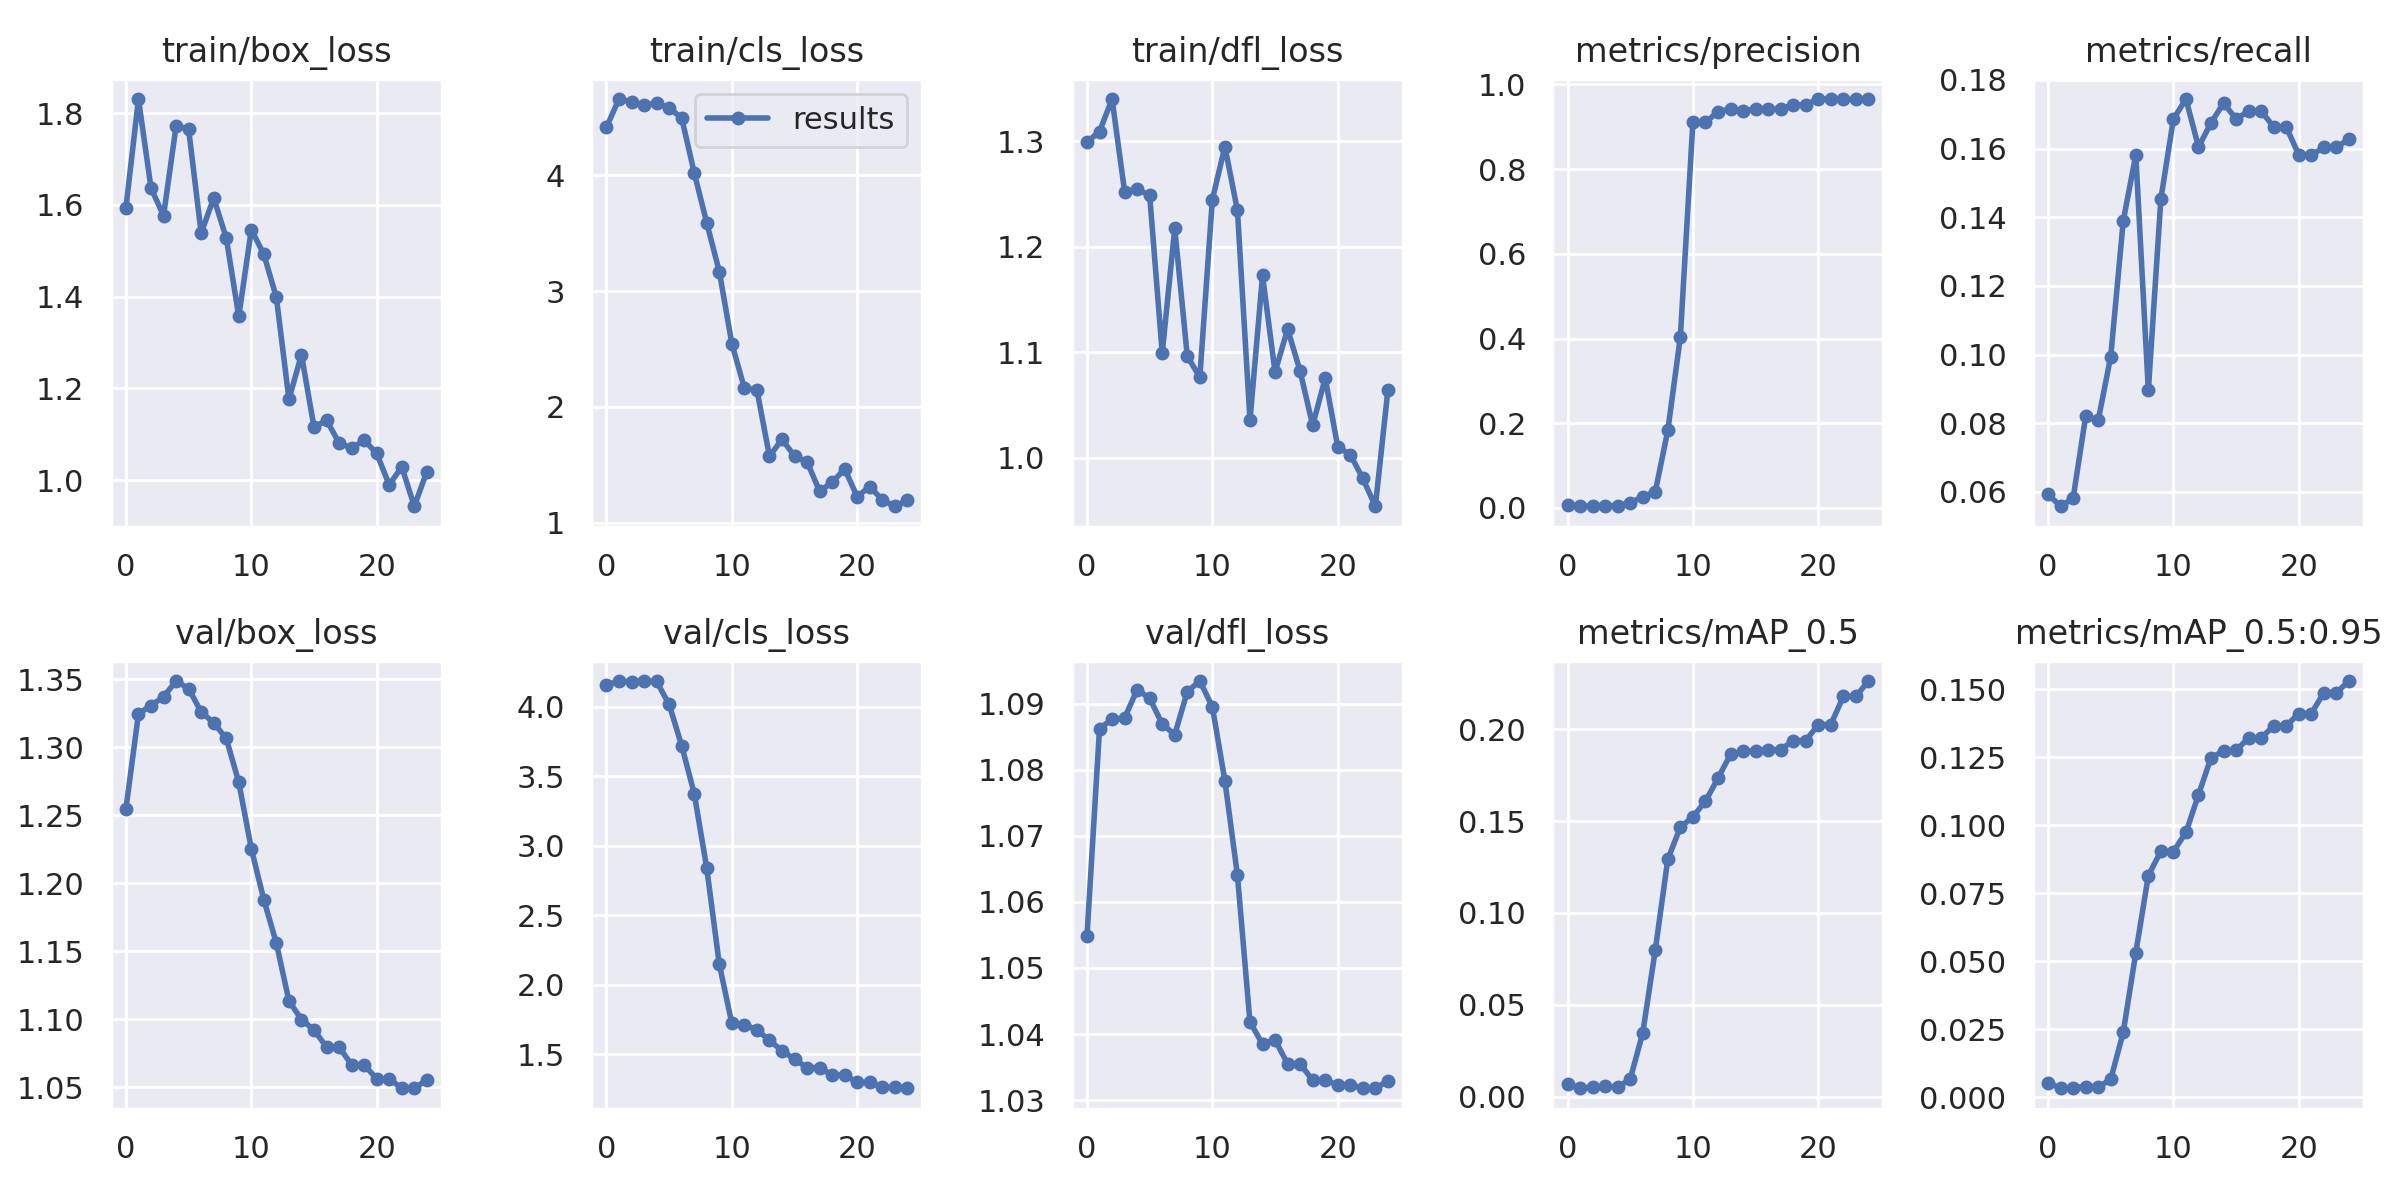

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

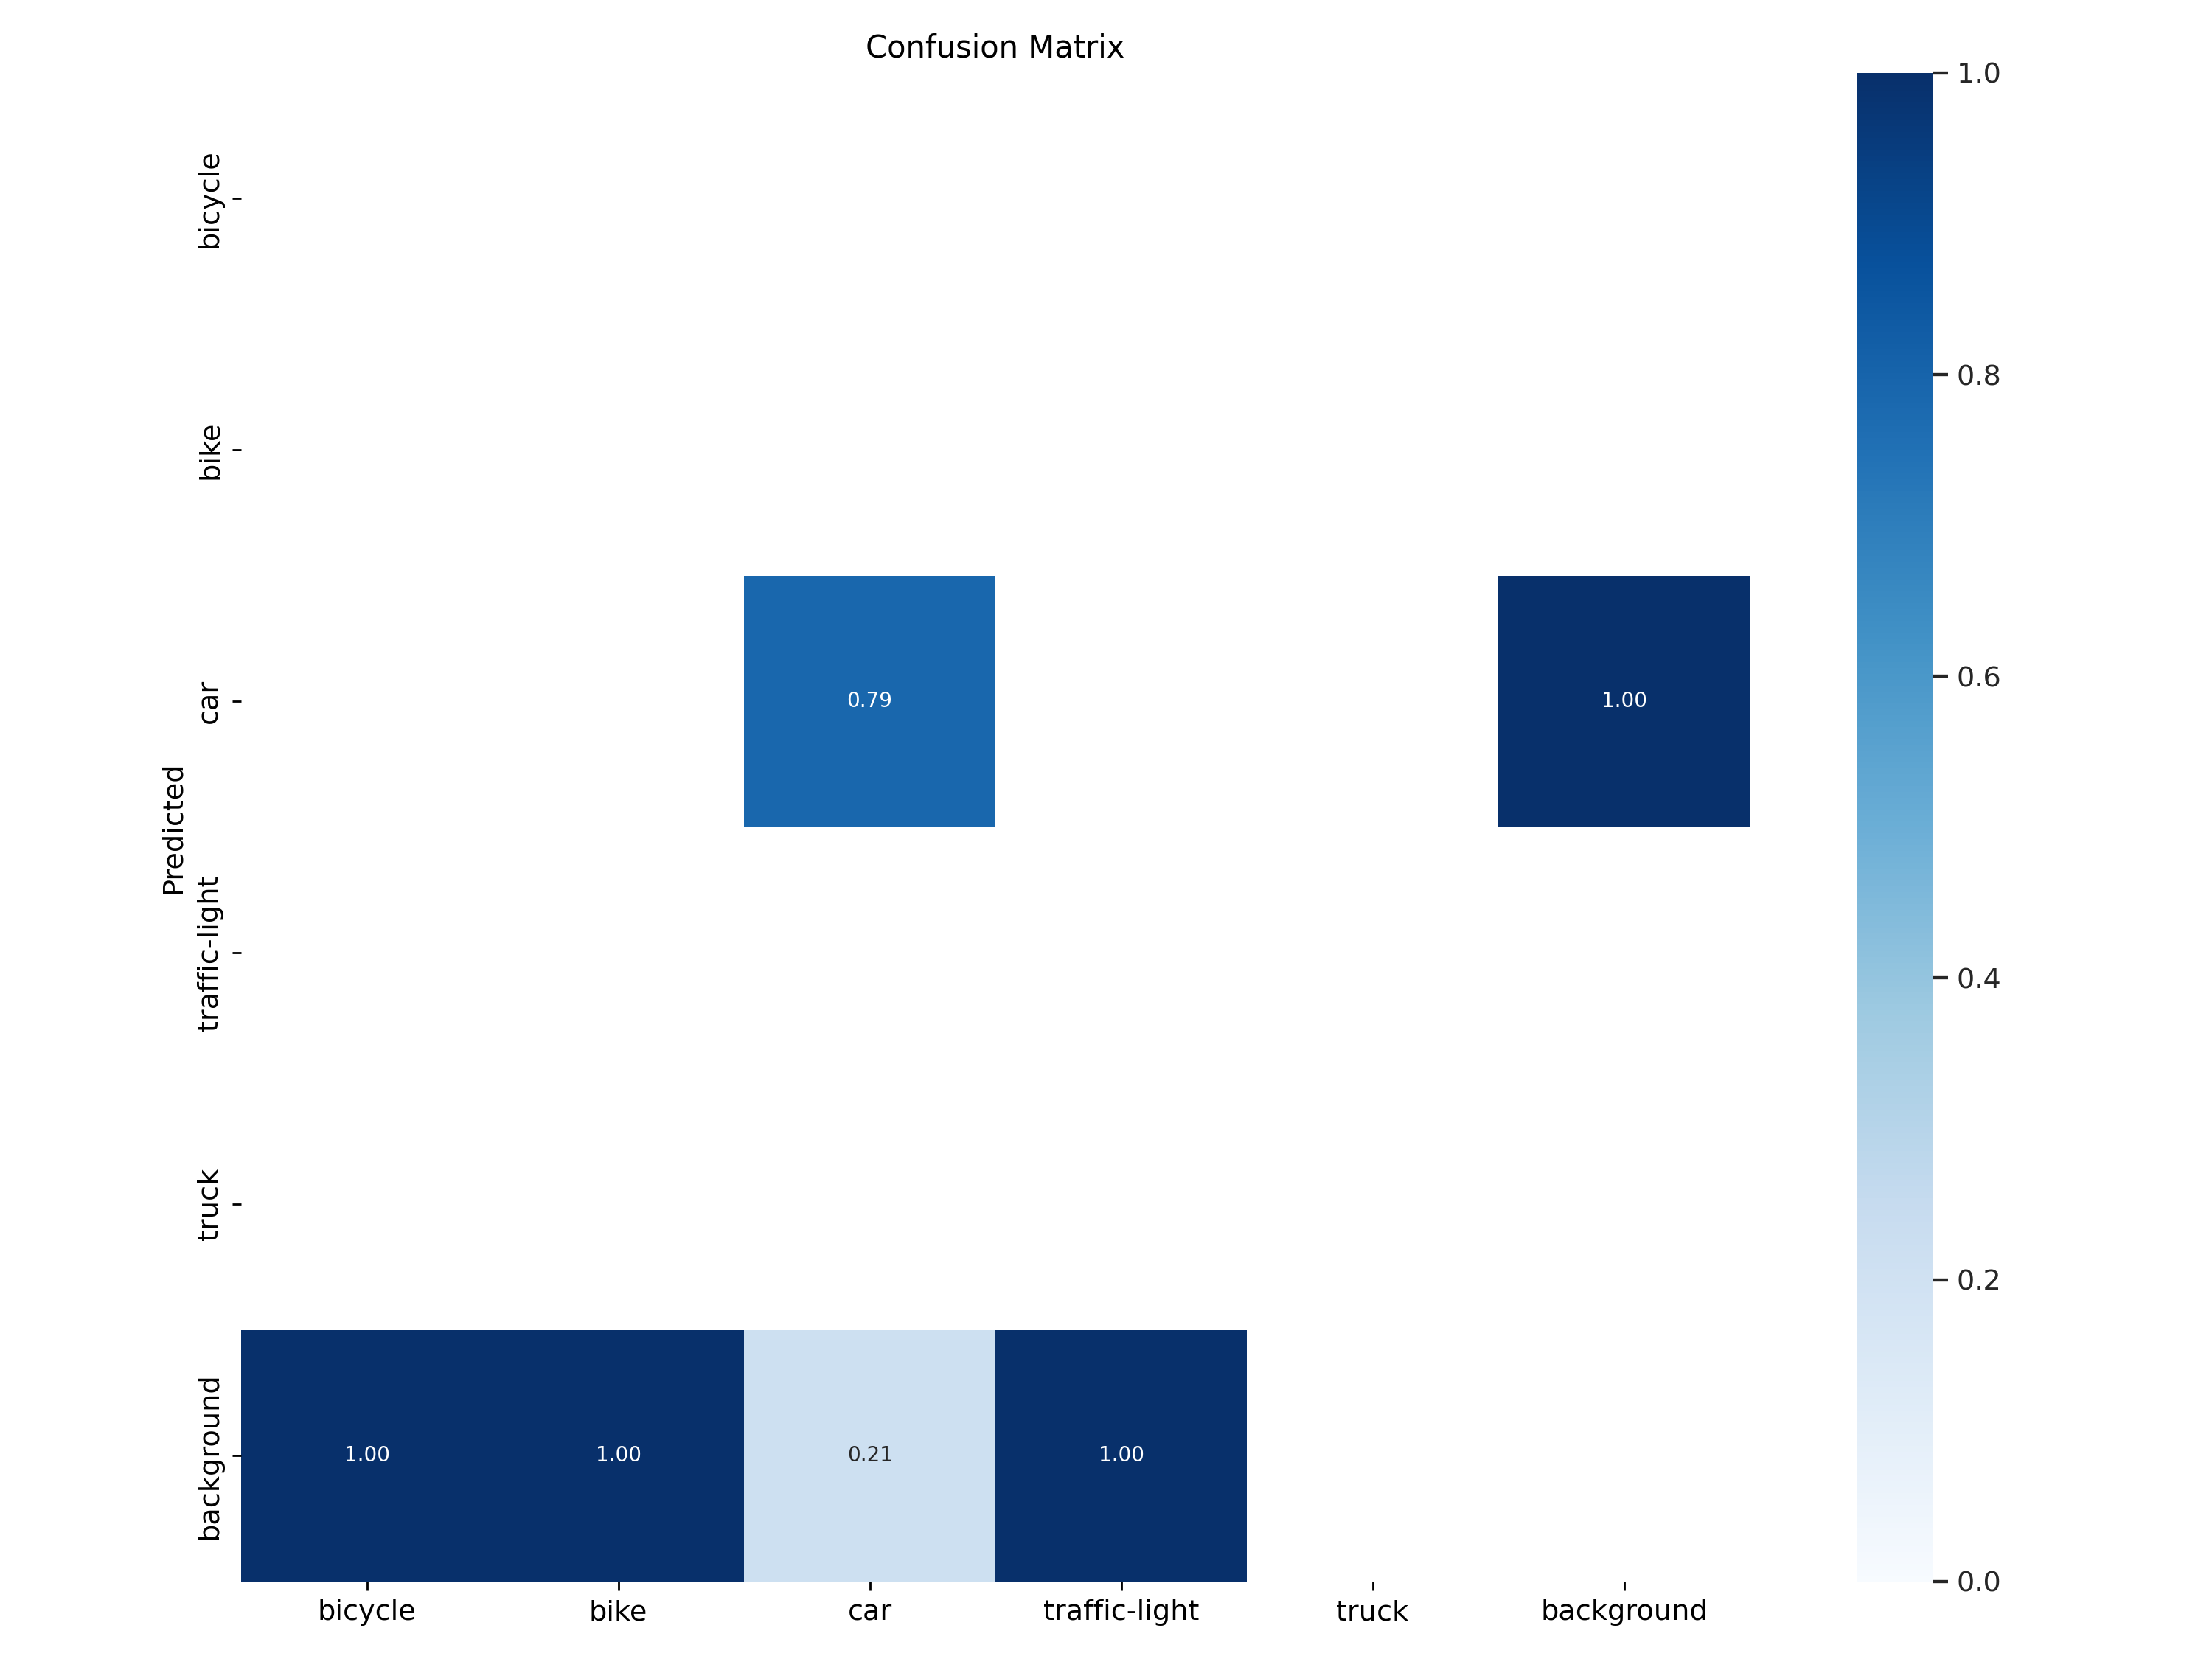

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

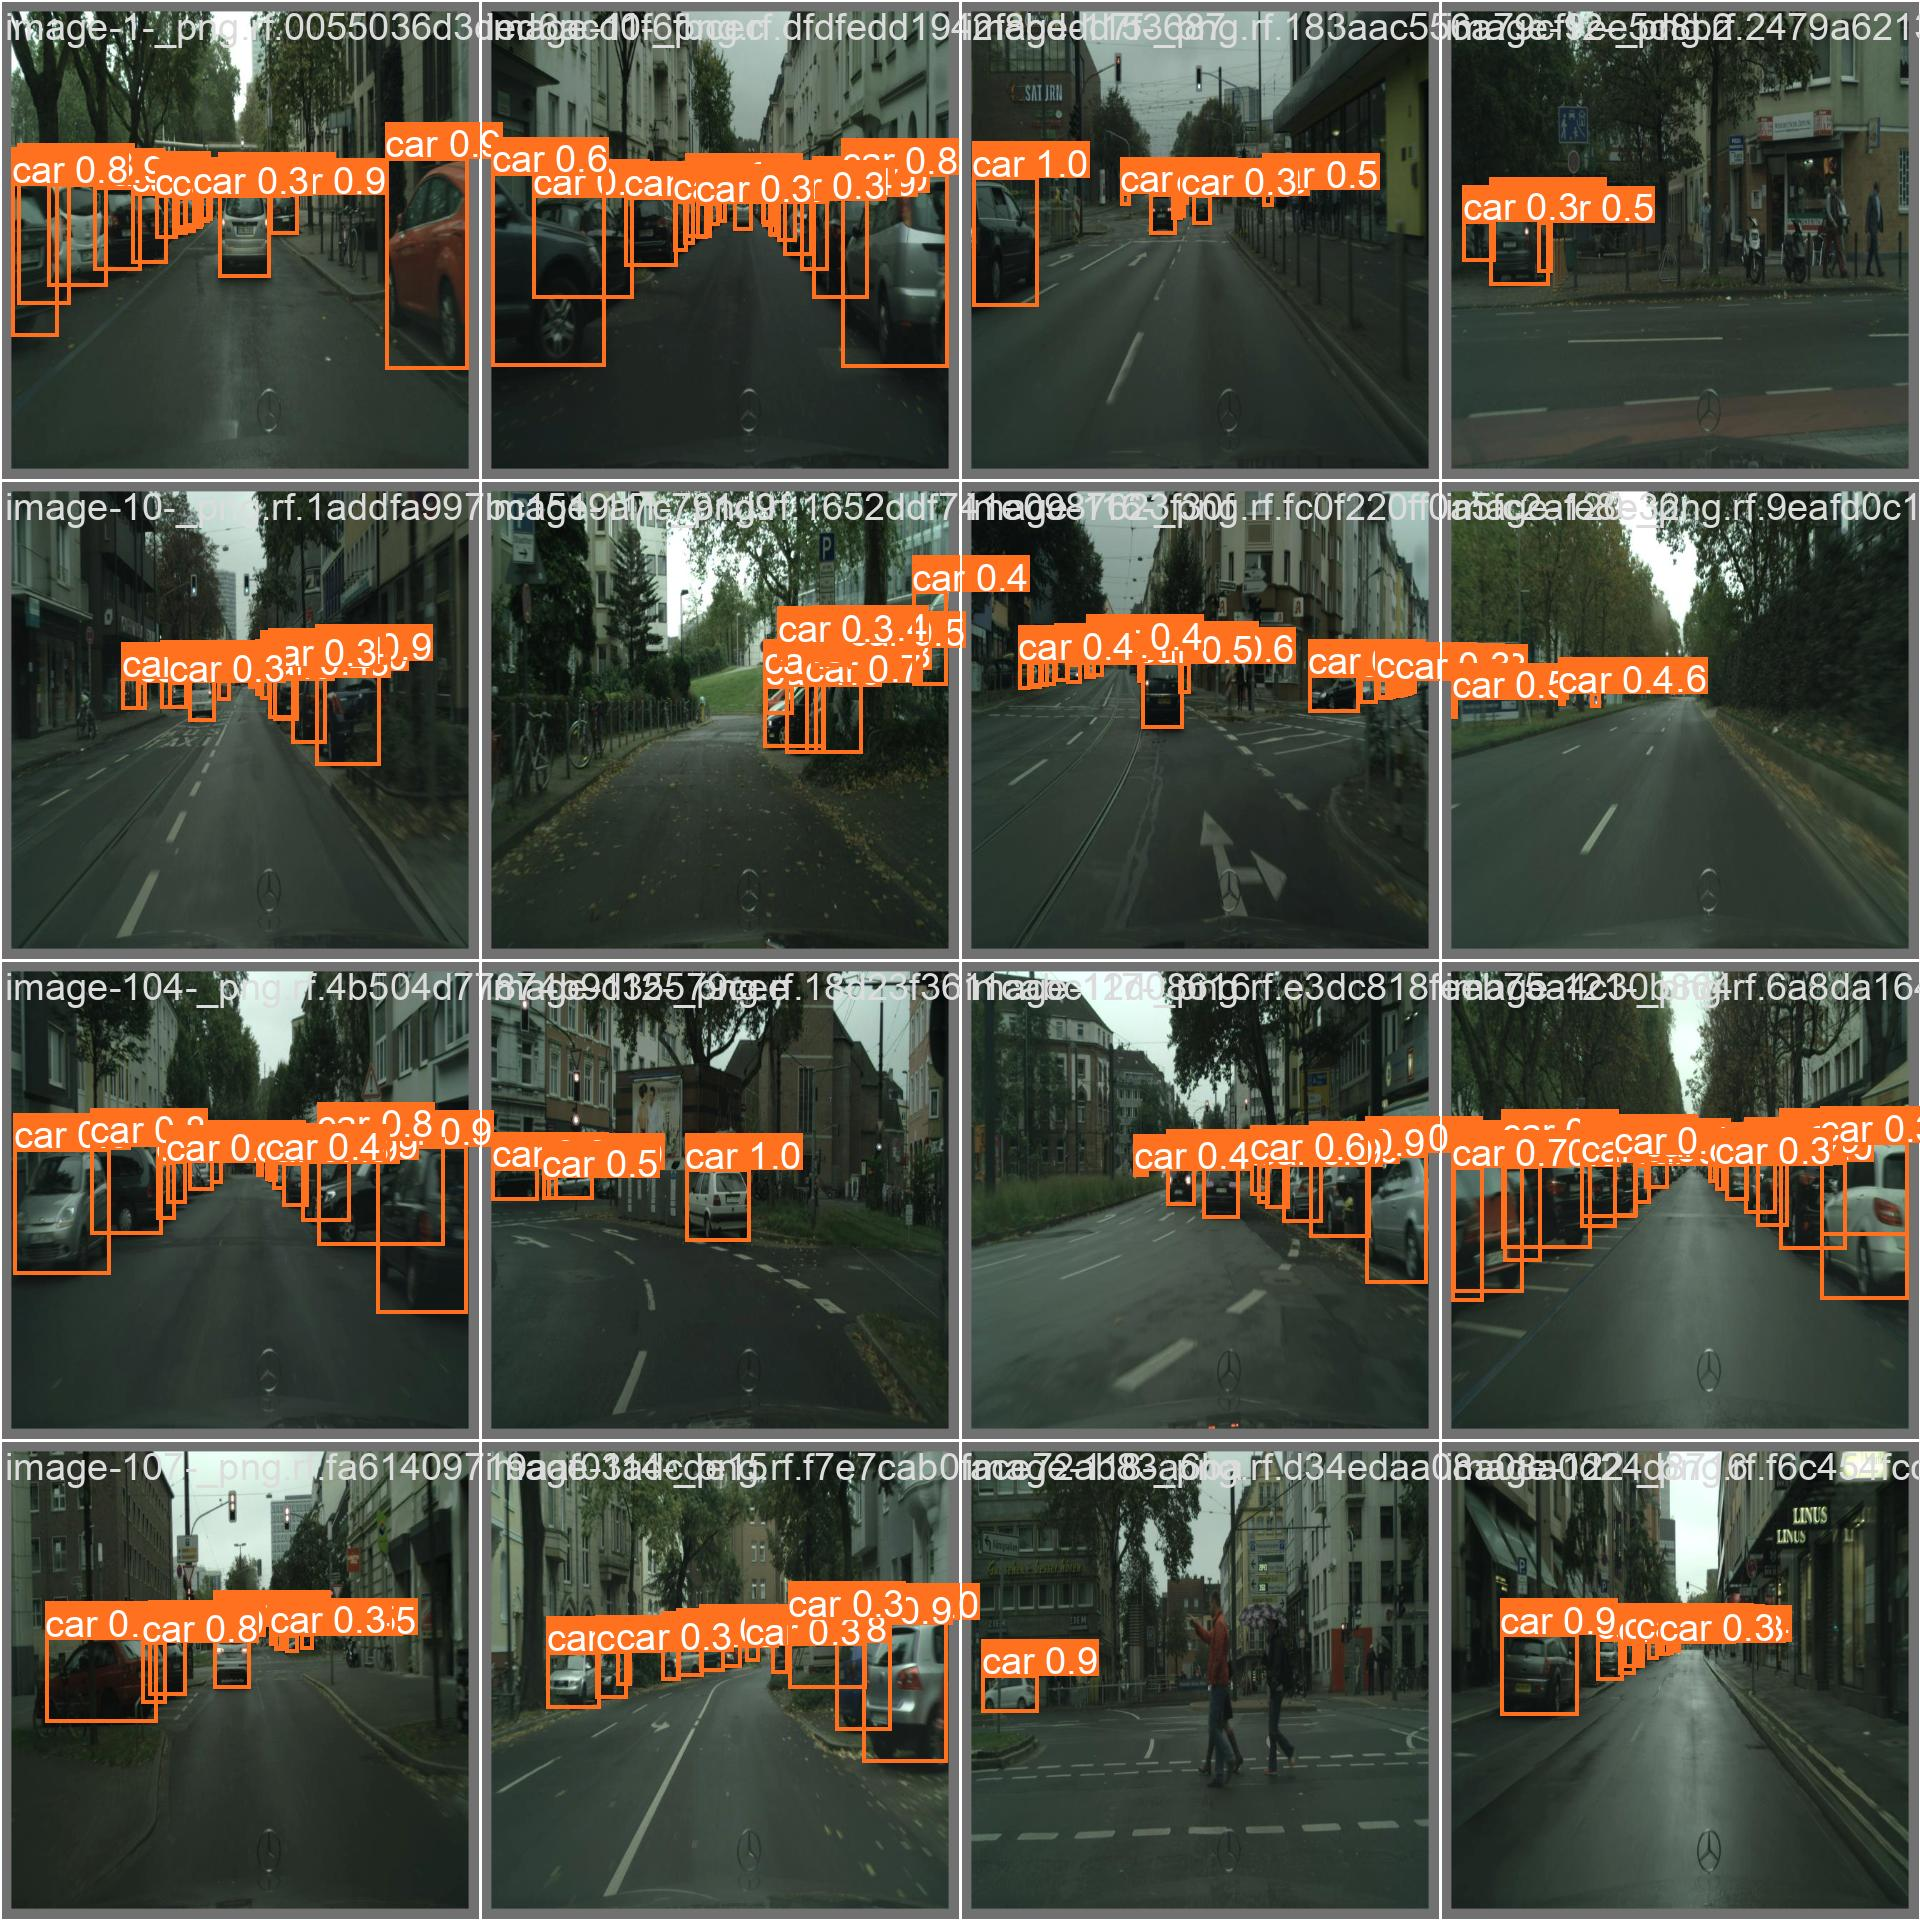

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Задание 2. Сформируйте свой датасет для детекции объектов и обучите на нем модель YOLOv9



Требования к датасету:

- Количество изображений в датасете: минимум 90
- Количество классов: более 2х
- Обязательно должны присутствовать изображения, содержащие несколько классов одновременно


*Примечание: Формирование датасета включает в себя поиск изображений и ручное аннотирование объектов на изображениях.*

In [ ]:
# тобы нам было проще управлять наборами данных, изображениями и моделями, мы создаем константу HOME.
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 325 (delta 158), reused 155 (delta 155), pack-reused 109
Receiving objects: 100% (325/325), 2.23 MiB | 7.38 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.9 MB/s eta 0:00:00


In [ ]:
# Установим пакет roboflow,
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00


In [ ]:
#Загрузим весовые коэффициенты модели
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 May 12 15:18 .
drwxr-xr-x 1 root root      4096 May 12 15:18 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [ ]:
!wget -P {HOME}/data -q https://media.roboflow.com/animals-sqrdn/dogs-mbail/dogs_00018.jpg

In [ ]:
SOURCE_IMAGE_PATH = f"{HOME}/dogs_00018.jpg"

In [ ]:
SOURCE_IMAGE_PATH

'/content/dogs_00018.jpg'

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
Traceback (most recent call last):
  File "/content/yolov9/detect.py", line 232, in <module>
    main(opt)
  File "/content/yolov9/detect.py", line 227, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov9/detect.p

In [ ]:
%cd {HOME}/yolov9

/content/yolov9


In [ ]:
# Импортируем библиотеку roboflow
import roboflow

# Входим в систему roboflow. Для этого вам потребуется ввести свои учетные данные.
roboflow.login()

# Создаем экземпляр класса Roboflow
rf = roboflow.Roboflow()

# Получаем доступ к проекту в рабочем пространстве.
# Здесь "animals-sqrdn" - это имя рабочего пространства, а "dogs-mbail" - имя проекта.

project = rf.workspace("animals-sqrdn").project("dogs-mbail")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
#Вывод списка версий:
project.list_versions()

[{'id': 'animals-sqrdn/dogs-mbail/1', 'name': '2024-05-05 6:52pm', 'created': 1714924337.317, 'images': 167, 'splits': {'valid': 33, 'test': 17, 'train': 117}, 'preprocessing': {'auto-orient': True, 'resize': {'format': 'Stretch to', 'width': '640', 'height': '640'}}, 'augmentation': {}, 'exports': ['yolov9']}]


In [ ]:
#Указываем версию проекта и скачиваем датасет для этой версии проекта в формате yolov9:
version = project.version(1)
dataset = version.download("yolov9")


Extracting Dataset Version Zip to Dogs-1 in yolov9:: 100%|██████████| 346/346 [00:00<00:00, 7189.36it/s]


In [ ]:
#Обучение модели
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-05-12 15:19:54.192537: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 15:19:54.192590: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 15:19:54.193999: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-12 15:19:55.263353: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/Dogs-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=

In [ ]:
# ОПРЕДЕЛЕНИЯ
# Переходим в директорию yolov9 в домашнем каталоге
#%cd {HOME}/yolov9

# Запускаем скрипт train.py с различными параметрами
!python train.py \
# Устанавливаем размер пакета равным 16
--batch 16 \
# Устанавливаем количество эпох равным 25
--epochs 25 \
# Устанавливаем размер изображения равным 640
--img 640 \
# Устанавливаем устройство для обучения (в данном случае, это GPU с индексом 0)
--device 0 \
# Устанавливаем минимальное количество элементов в пакете равным 0
--min-items 0 \
# Устанавливаем параметр close-mosaic равным 15
--close-mosaic 15 \
# Указываем путь к файлу data.yaml, который содержит информацию о датасете
--data {dataset.location}/data.yaml \
# Указываем путь к файлу с весами модели
--weights {HOME}/weights/gelan-c.pt \
# Указываем путь к файлу конфигурации модели
--cfg models/detect/gelan-c.yaml \
# Указываем путь к файлу с гиперпараметрами
--hyp hyp.scratch-high.yaml


SyntaxError: invalid syntax (<ipython-input-18-112232d610d4>, line 7)

In [ ]:
#Статистика обучения
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    P_curve.png       train_batch2.jpg
events.out.tfevents.1715527196.d817545acc7b.1745.0  PR_curve.png      val_batch0_labels.jpg
F1_curve.png					    R_curve.png       val_batch0_pred.jpg
hyp.yaml					    results.csv       val_batch1_labels.jpg
labels_correlogram.jpg				    results.png       val_batch1_pred.jpg
labels.jpg					    train_batch0.jpg  weights
opt.yaml					    train_batch1.jpg


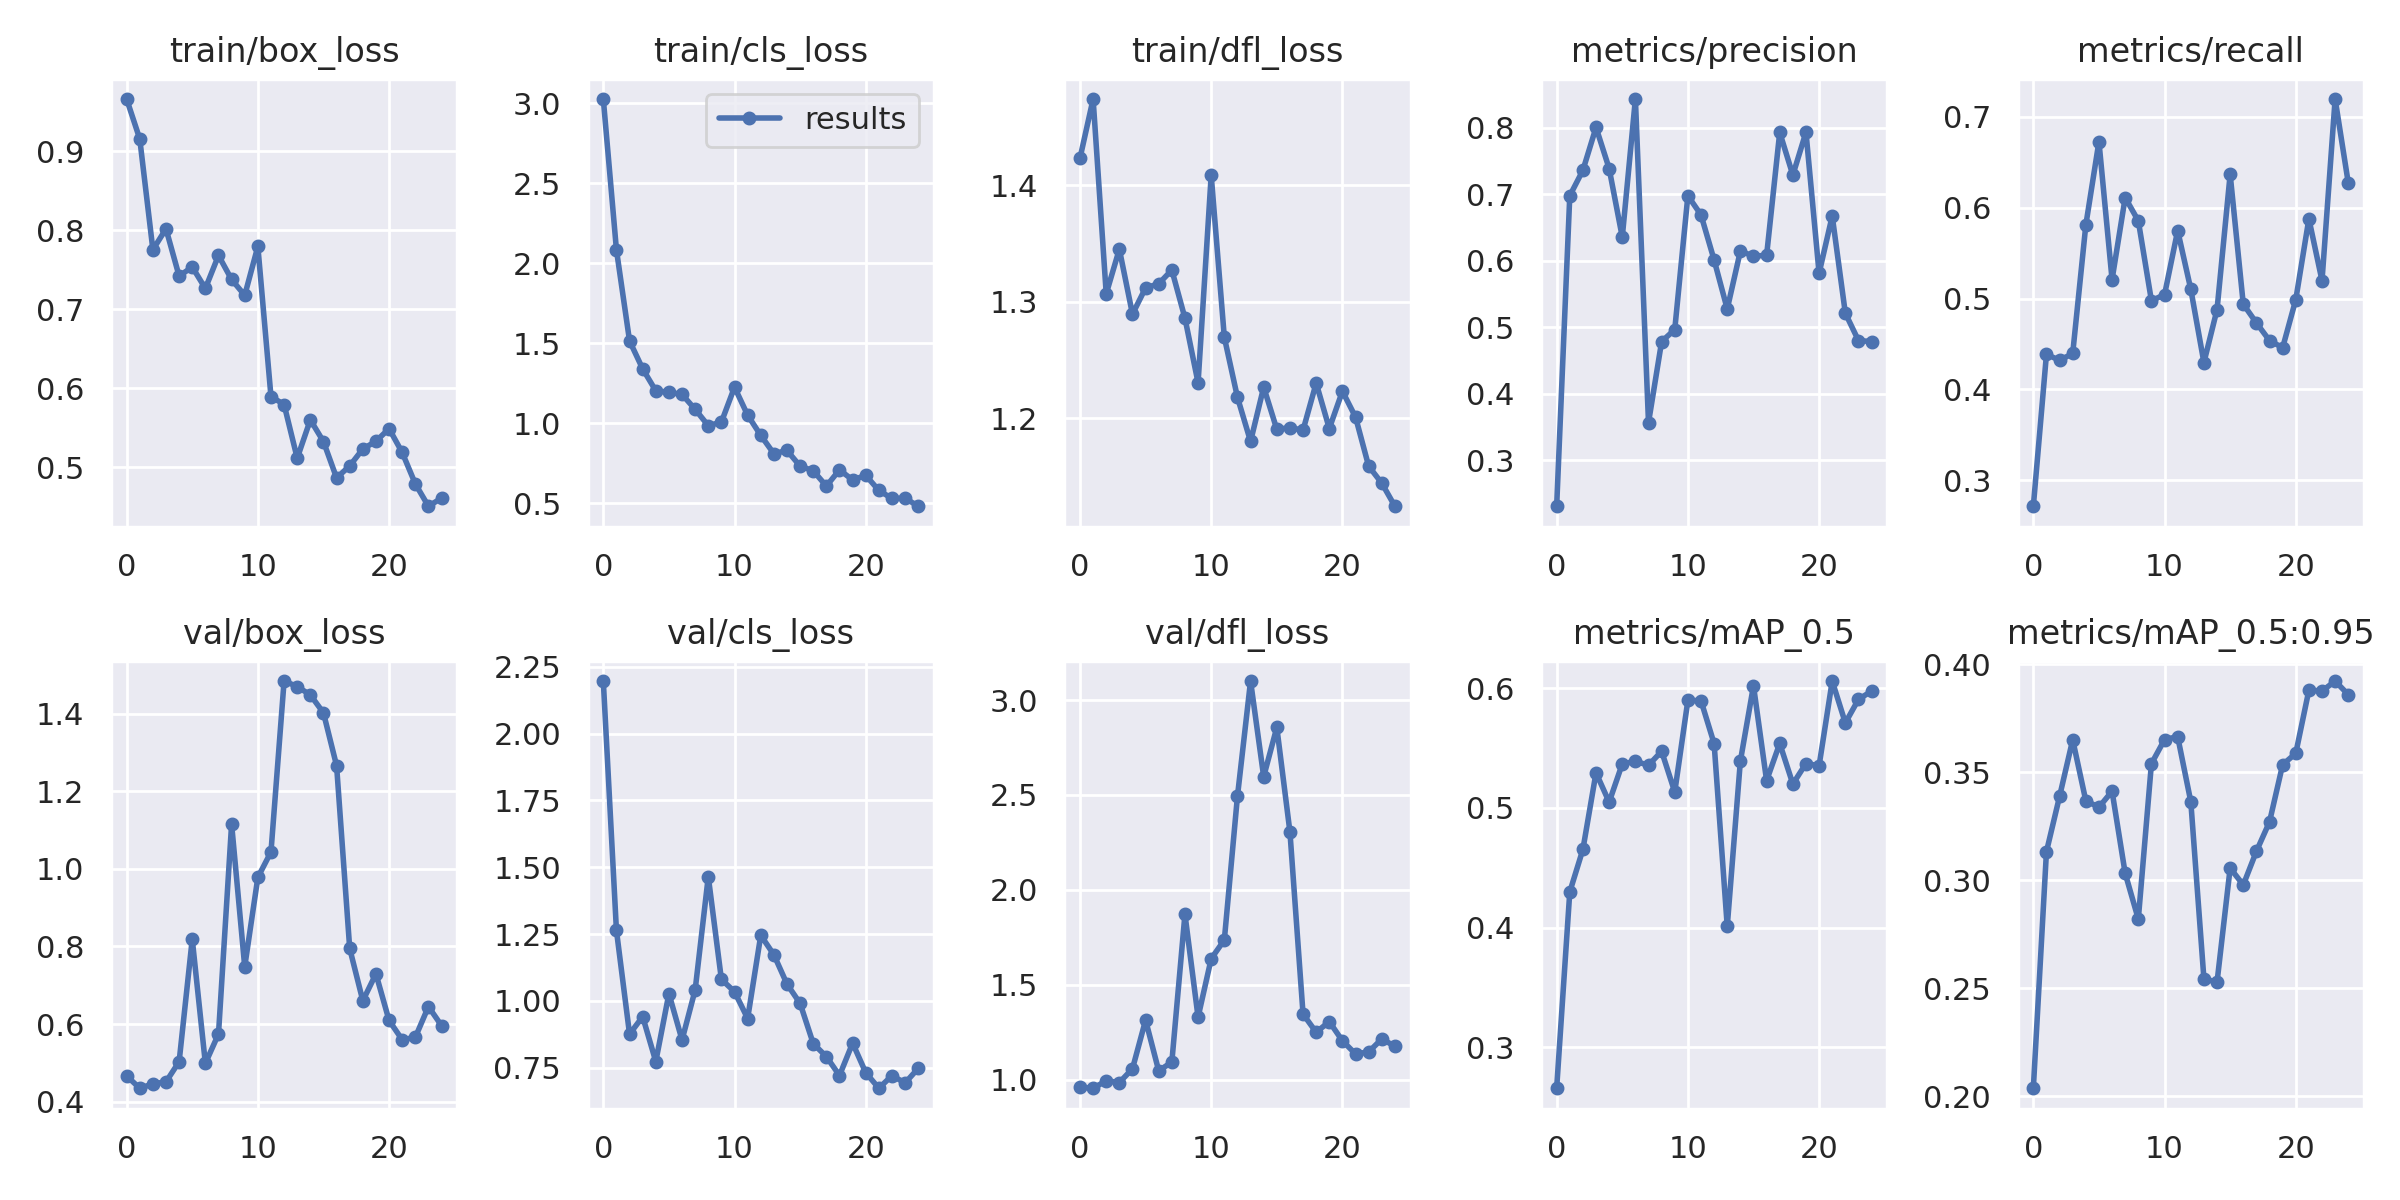

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

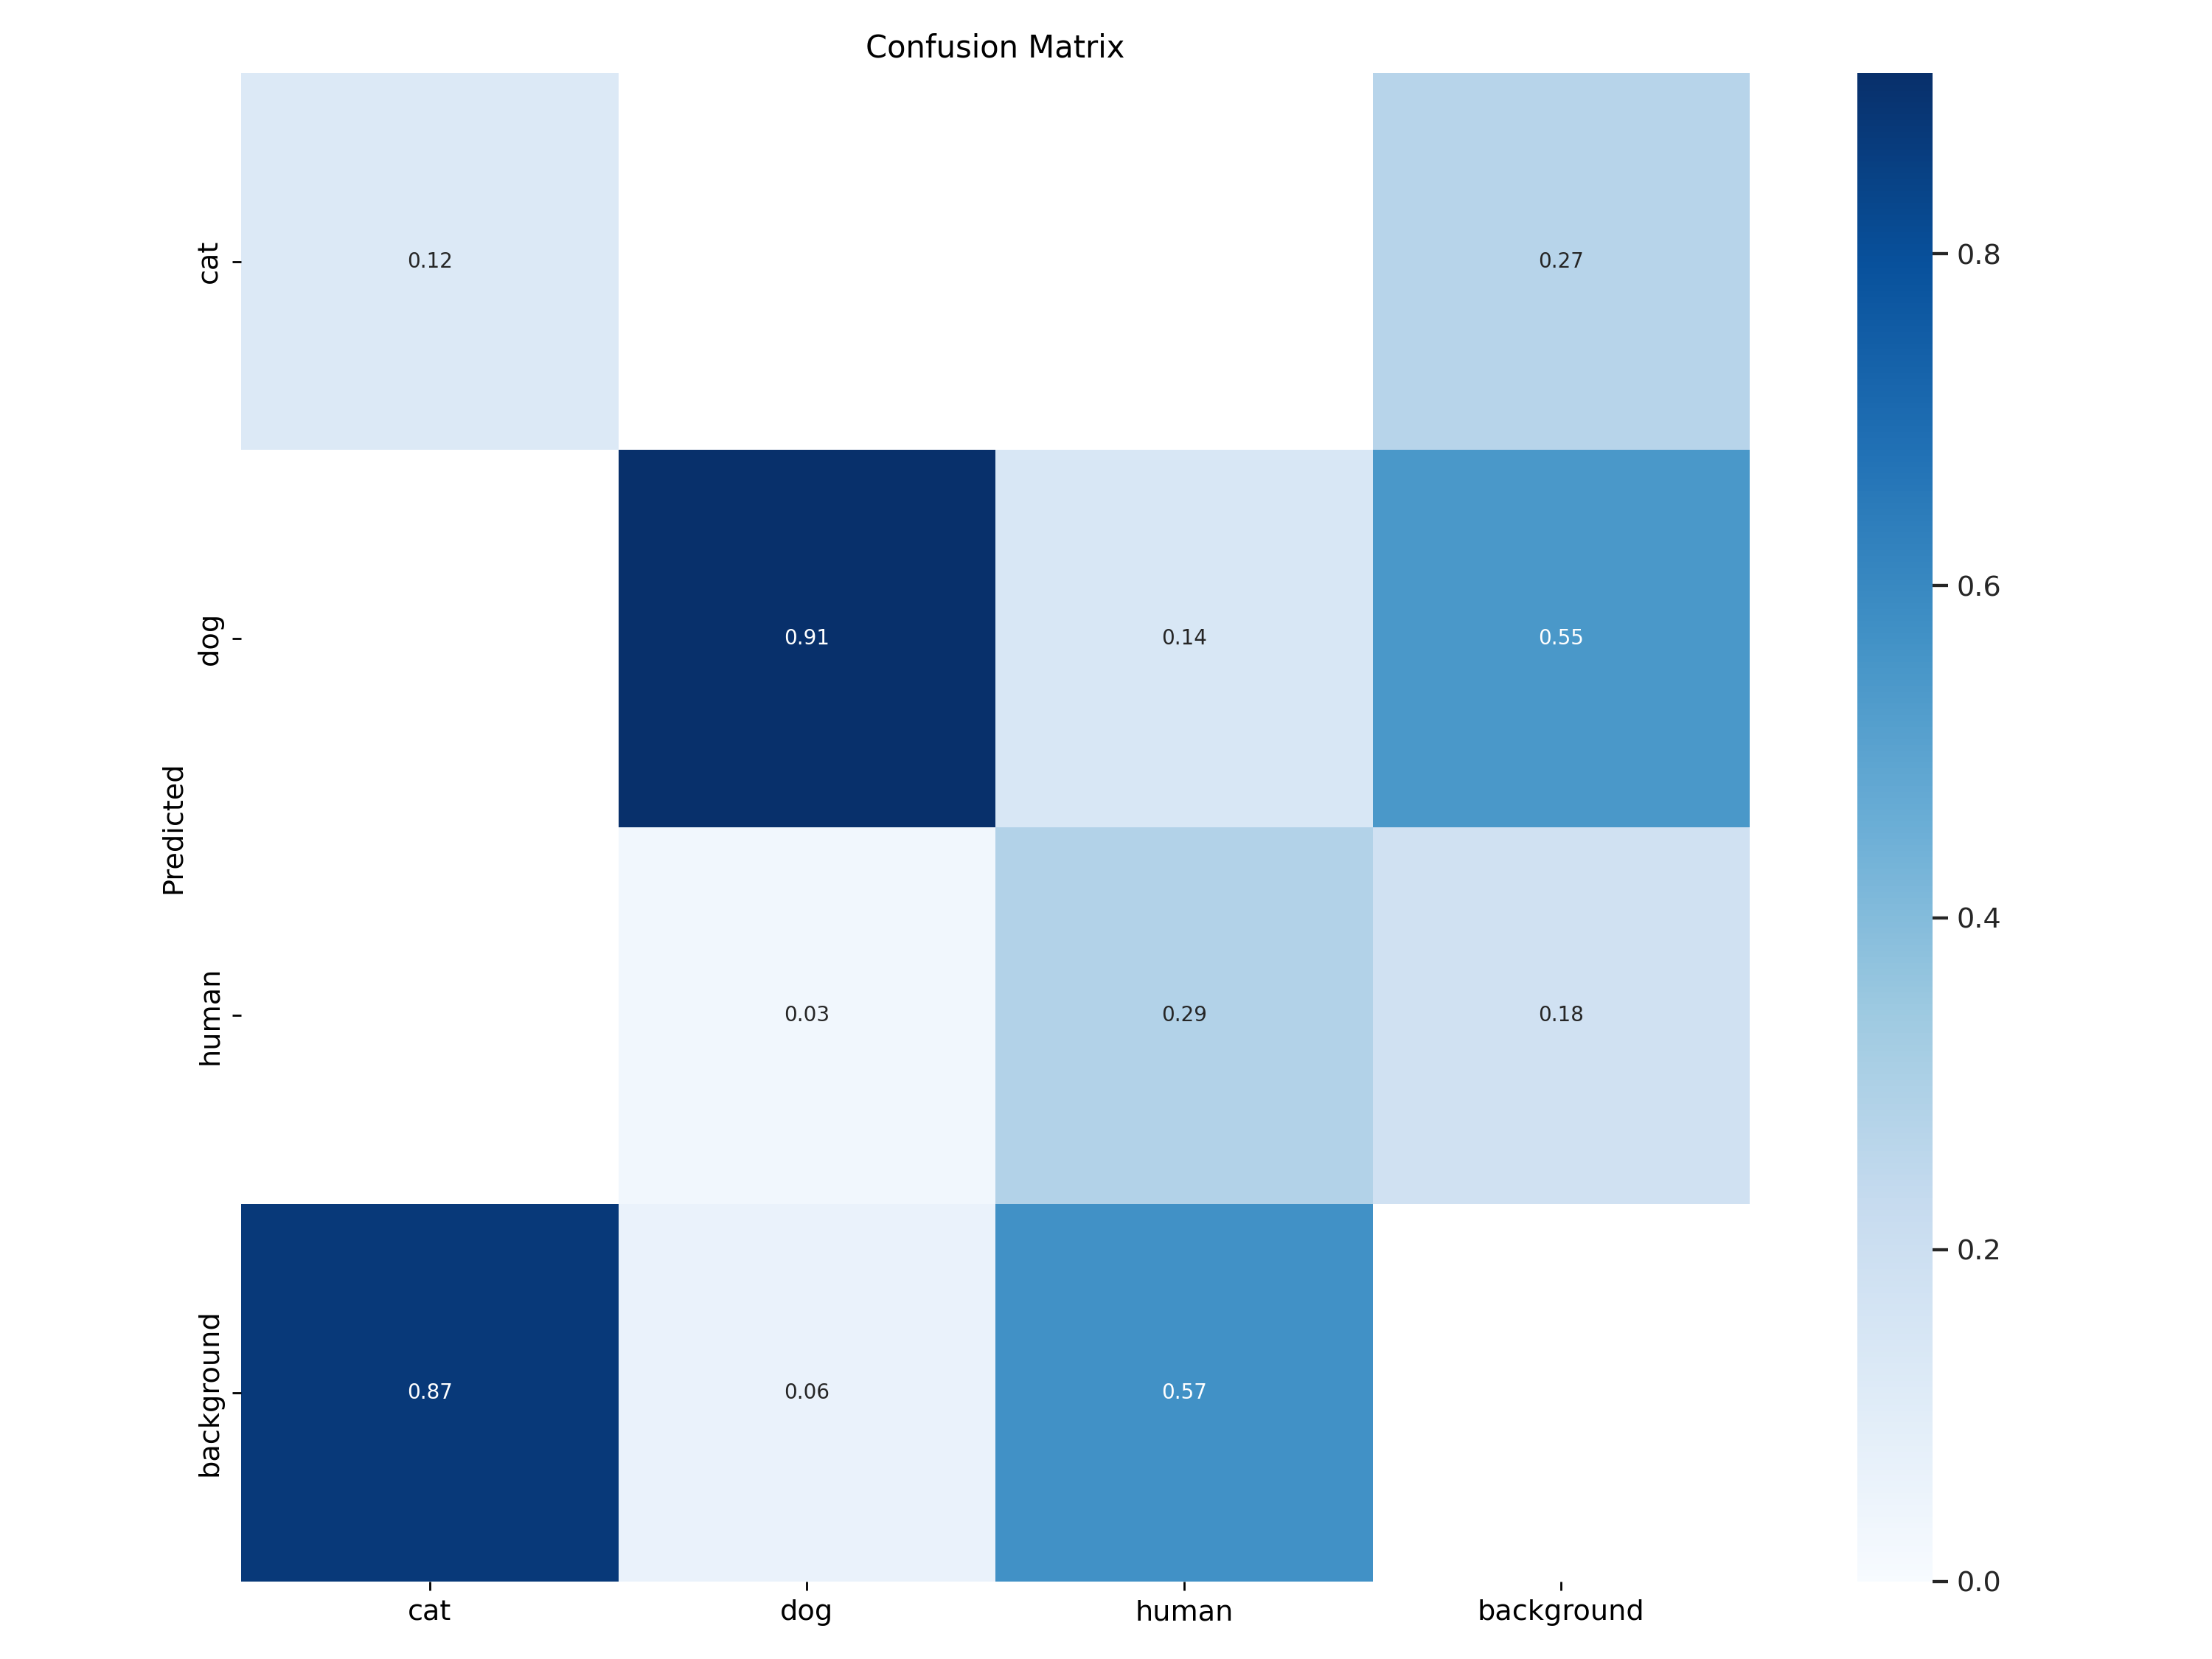

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

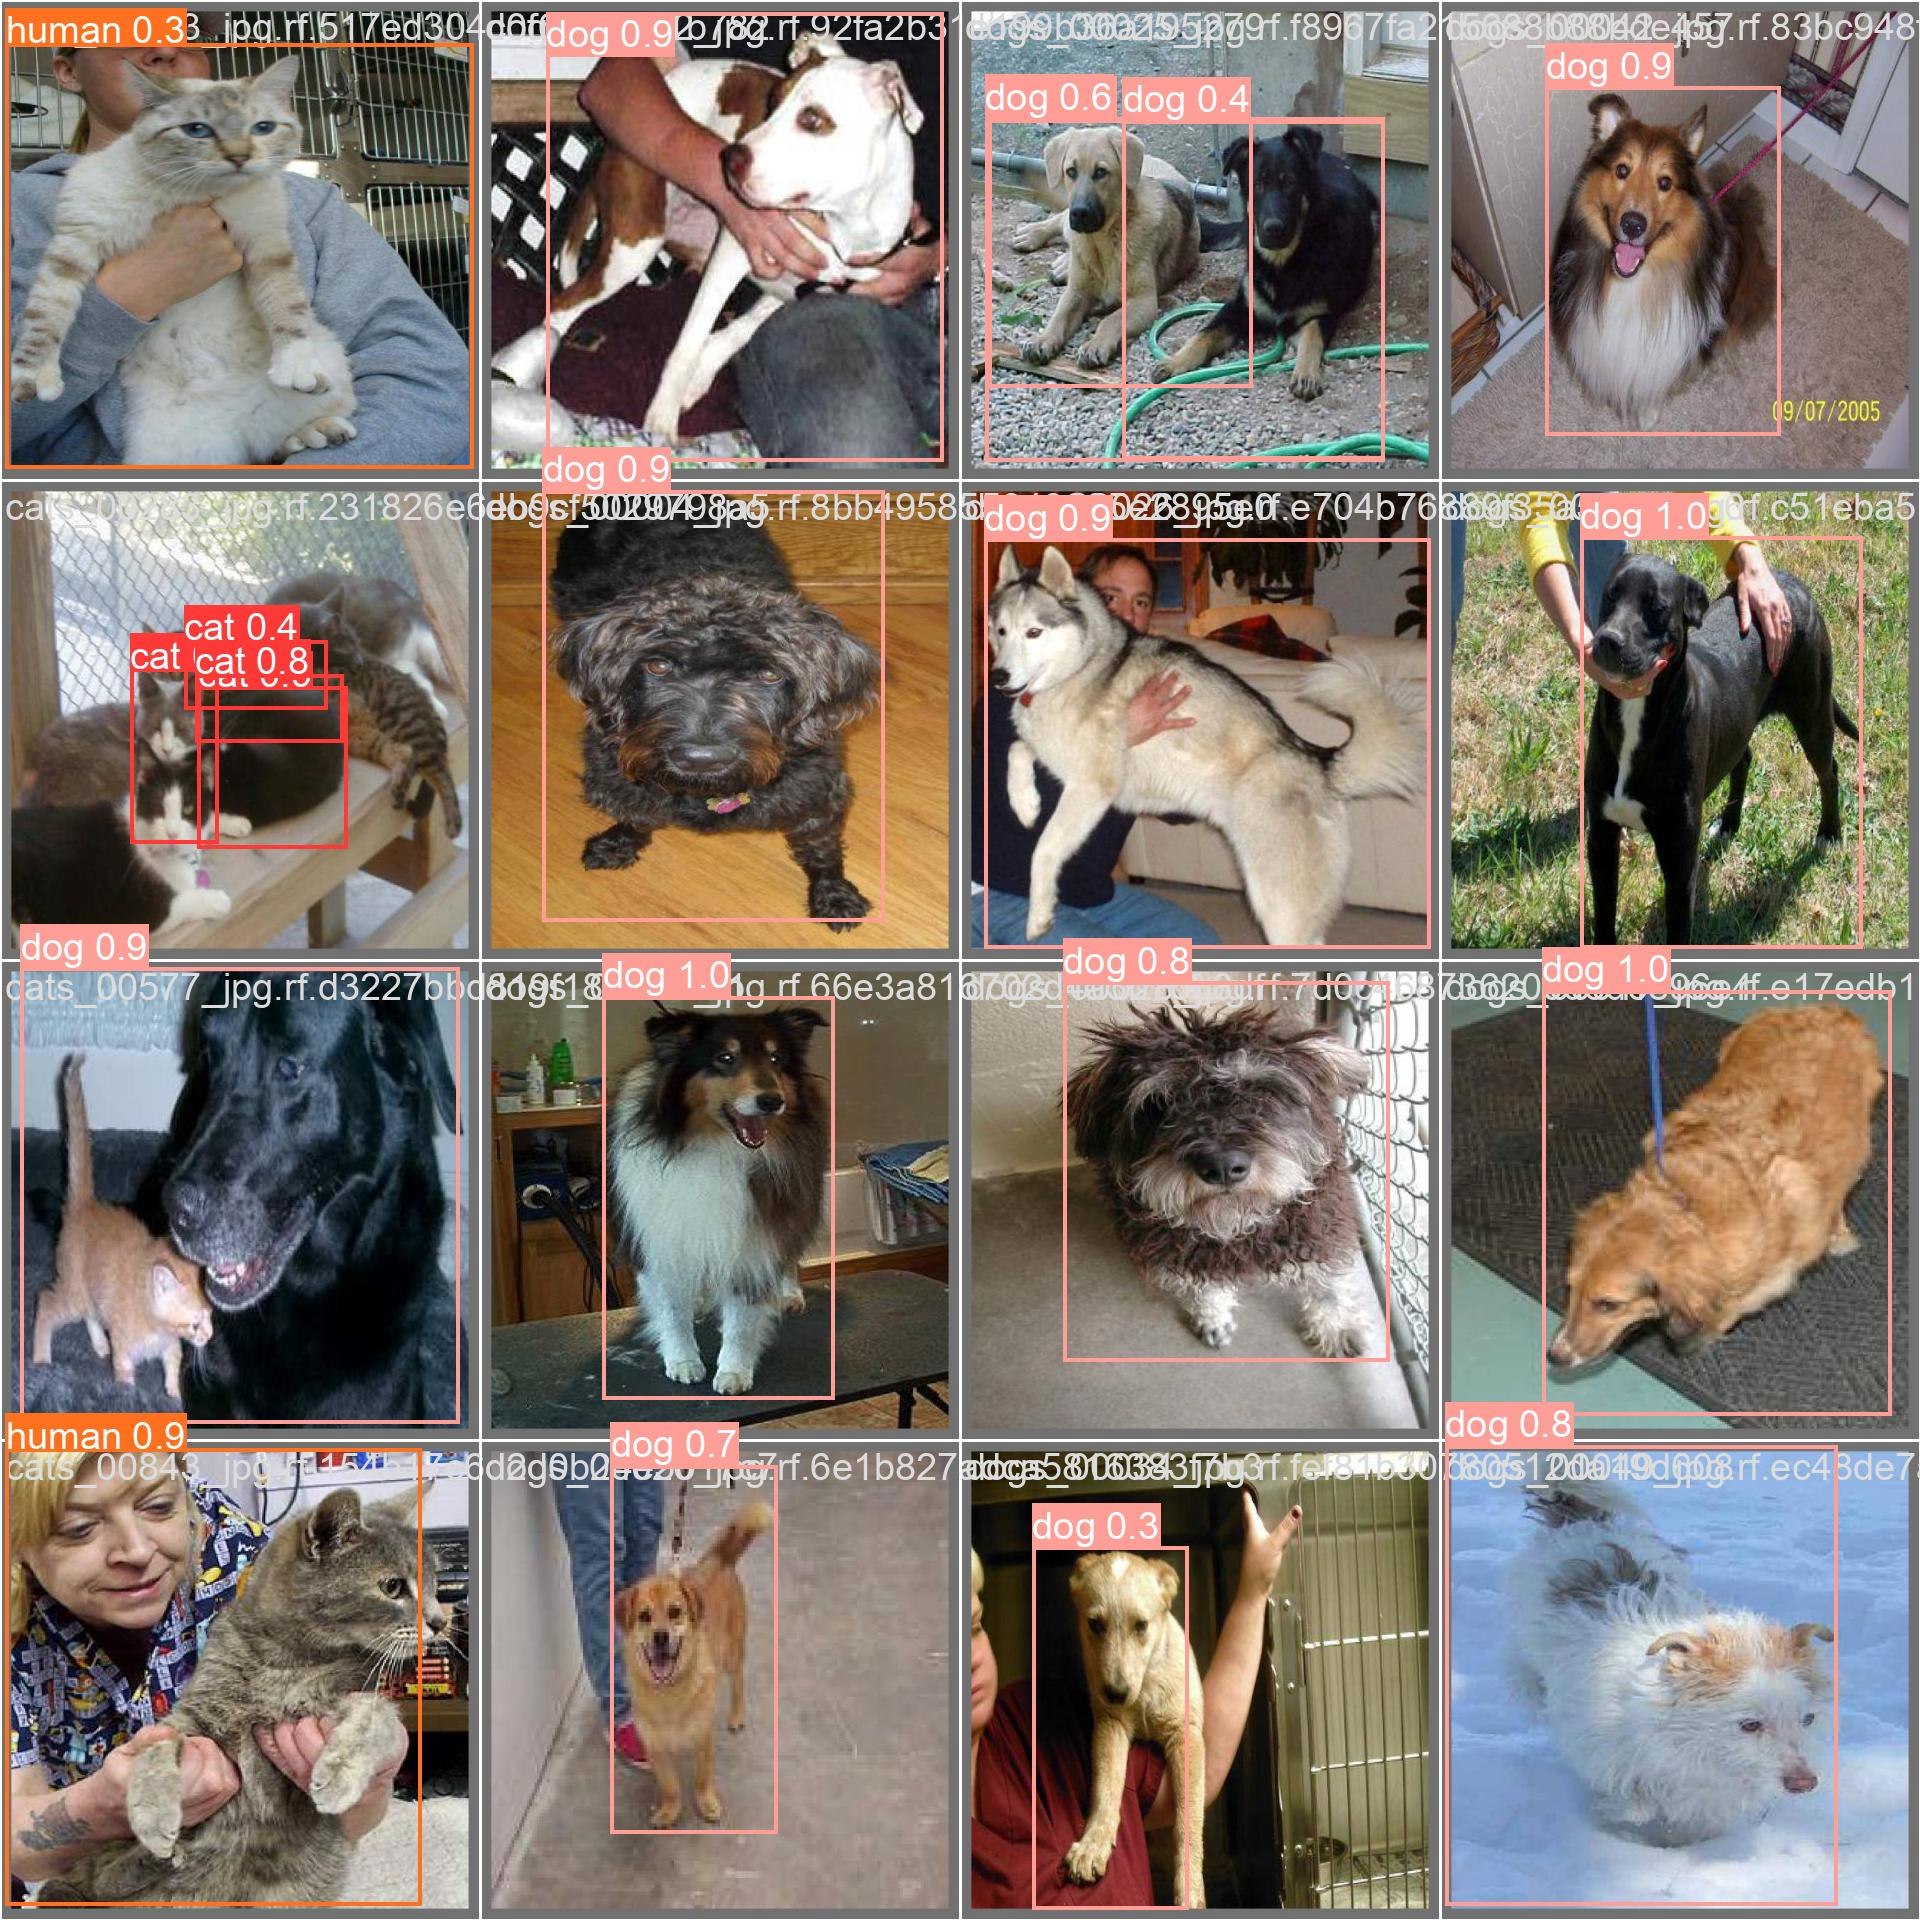

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

In [ ]:
#Проверка на валидационном наборе
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val: data=/content/yolov9/Dogs-1/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25413273 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/Dogs-1/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances        

In [ ]:
#Развертывание модели YOLOv9
!pip install -q inference supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.1/356.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 940.0/940.0 kB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
import cv2
import random
# Импортируем модуль getpass, который предоставляет
# портативный способ обработки паролей безопасным образом
import getpass

# Импортируем модуль supervision (sv), для аннотации конечных изображений
import supervision as sv

# Импортируем функцию get_model из модуля inference.
# Эта функция, вероятно, используется для загрузки
# обученной модели и для выполнения вывода
from inference import get_model


# %matplotlib inline

In [ ]:
# Запускаем процесс развертывания модели с помощью метода deploy объекта version
version.deploy(
    # Указываем тип модели, в данном случае "yolov9"
    model_type="yolov9",
    # Указываем путь к файлу с весами модели
    model_path=f"{HOME}/yolov9/runs/train/exp"
)

View the status of your deployment at: https://app.roboflow.com/animals-sqrdn/dogs-mbail/1
Share your model with the world at: https://universe.roboflow.com/animals-sqrdn/dogs-mbail/model/1


In [ ]:
# Используем функцию getpass для безопасного ввода API-ключа Roboflow
ROBOFLOW_API_KEY = getpass.getpass()

# Получаем модель с помощью функции get_model. Мы передаем идентификатор модели и API-ключ.
model = get_model(
    # Идентификатор модели, который состоит из имени проекта и номера версии
    model_id="first-ugfem/1",
    # API-ключ для доступа к Roboflow
    api_key=ROBOFLOW_API_KEY
)

··········


## Задание 3 (для магистрантов). Обучите модель на датасете [RSD-GOD](https://github.com/Dr-Zhuang/geospatial-object-detection). Затем самостоятельно сформируйте тестовые данные (не менее 50 изображений с аннотациями) и оцените качество обученной модели:



**Прямая ссылка на загрузку датасета: [загрузить](https://drive.google.com/open?id=1ttvSta0BRxW7tTV_st89vSb_obHVre34)**

 *Примечание: для поиска данных удобно использовать сервис Google Earth/Google Earth Engine*

In [ ]:
# тобы нам было проще управлять наборами данных, изображениями и моделями, мы создаем константу HOME.
import os
HOME = os.getcwd()
print(HOME)

/content/yolov9


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 325 (delta 158), reused 155 (delta 155), pack-reused 109
Receiving objects: 100% (325/325), 2.23 MiB | 22.66 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9/yolov9


In [ ]:
# Установим пакет roboflow,
!pip install -q roboflow

In [ ]:
#Загрузим весовые коэффициенты модели
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402448
drwxr-xr-x  2 root root      4096 May 12 15:37 .
drwxr-xr-x 16 root root      4096 May 12 15:36 ..
-rw-r--r--  1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r--  1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r--  1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r--  1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/yolov9/weights/gelan-c.pt'], source=/content/yolov9/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
Traceback (most recent call last):
  File "/content/yolov9/yolov9/detect.py", line 232, in <module>
    main(opt)
  File "/content/yolov9/yolov9/detect.py", line 227, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  Fi

In [ ]:
%cd {HOME}/yolov9

/content/yolov9/yolov9


In [ ]:
# Импортируем библиотеку roboflow
import roboflow

# Входим в систему roboflow. Для этого вам потребуется ввести свои учетные данные.
roboflow.login()

# Создаем экземпляр класса Roboflow
rf = roboflow.Roboflow()

# Получаем доступ к проекту в рабочем пространстве.
# Здесь "animals-sqrdn" - это имя рабочего пространства, а "rsd-god" - имя проекта.

project = rf.workspace("animals-sqrdn").project("rsd-god")

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
#Вывод списка версий:
project.list_versions()

[{'id': 'animals-sqrdn/rsd-god/1', 'name': '2024-05-06 8:26pm', 'created': 1715016379.28, 'images': 9840, 'splits': {'valid': 1969, 'test': 983, 'train': 6888}, 'preprocessing': {'auto-orient': True, 'resize': {'width': 640, 'format': 'Stretch to', 'height': 640}}, 'augmentation': {}, 'exports': ['yolov9']}]


In [ ]:
#Указываем версию проекта и скачиваем датасет для этой версии проекта в формате yolov9:
version = project.version(1)
dataset = version.download("yolov9")


Extracting Dataset Version Zip to RSD-GOD-1 in yolov9:: 100%|██████████| 19690/19690 [00:04<00:00, 4905.03it/s]


In [ ]:
#Обучение модели
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9/yolov9
2024-05-12 15:38:59.232919: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 15:38:59.232997: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 15:38:59.235026: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-12 15:39:00.831737: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/yolov9/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/yolov9/RSD-GOD-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=Fal

In [ ]:
#Статистика обучения
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1715528341.d817545acc7b.7240.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


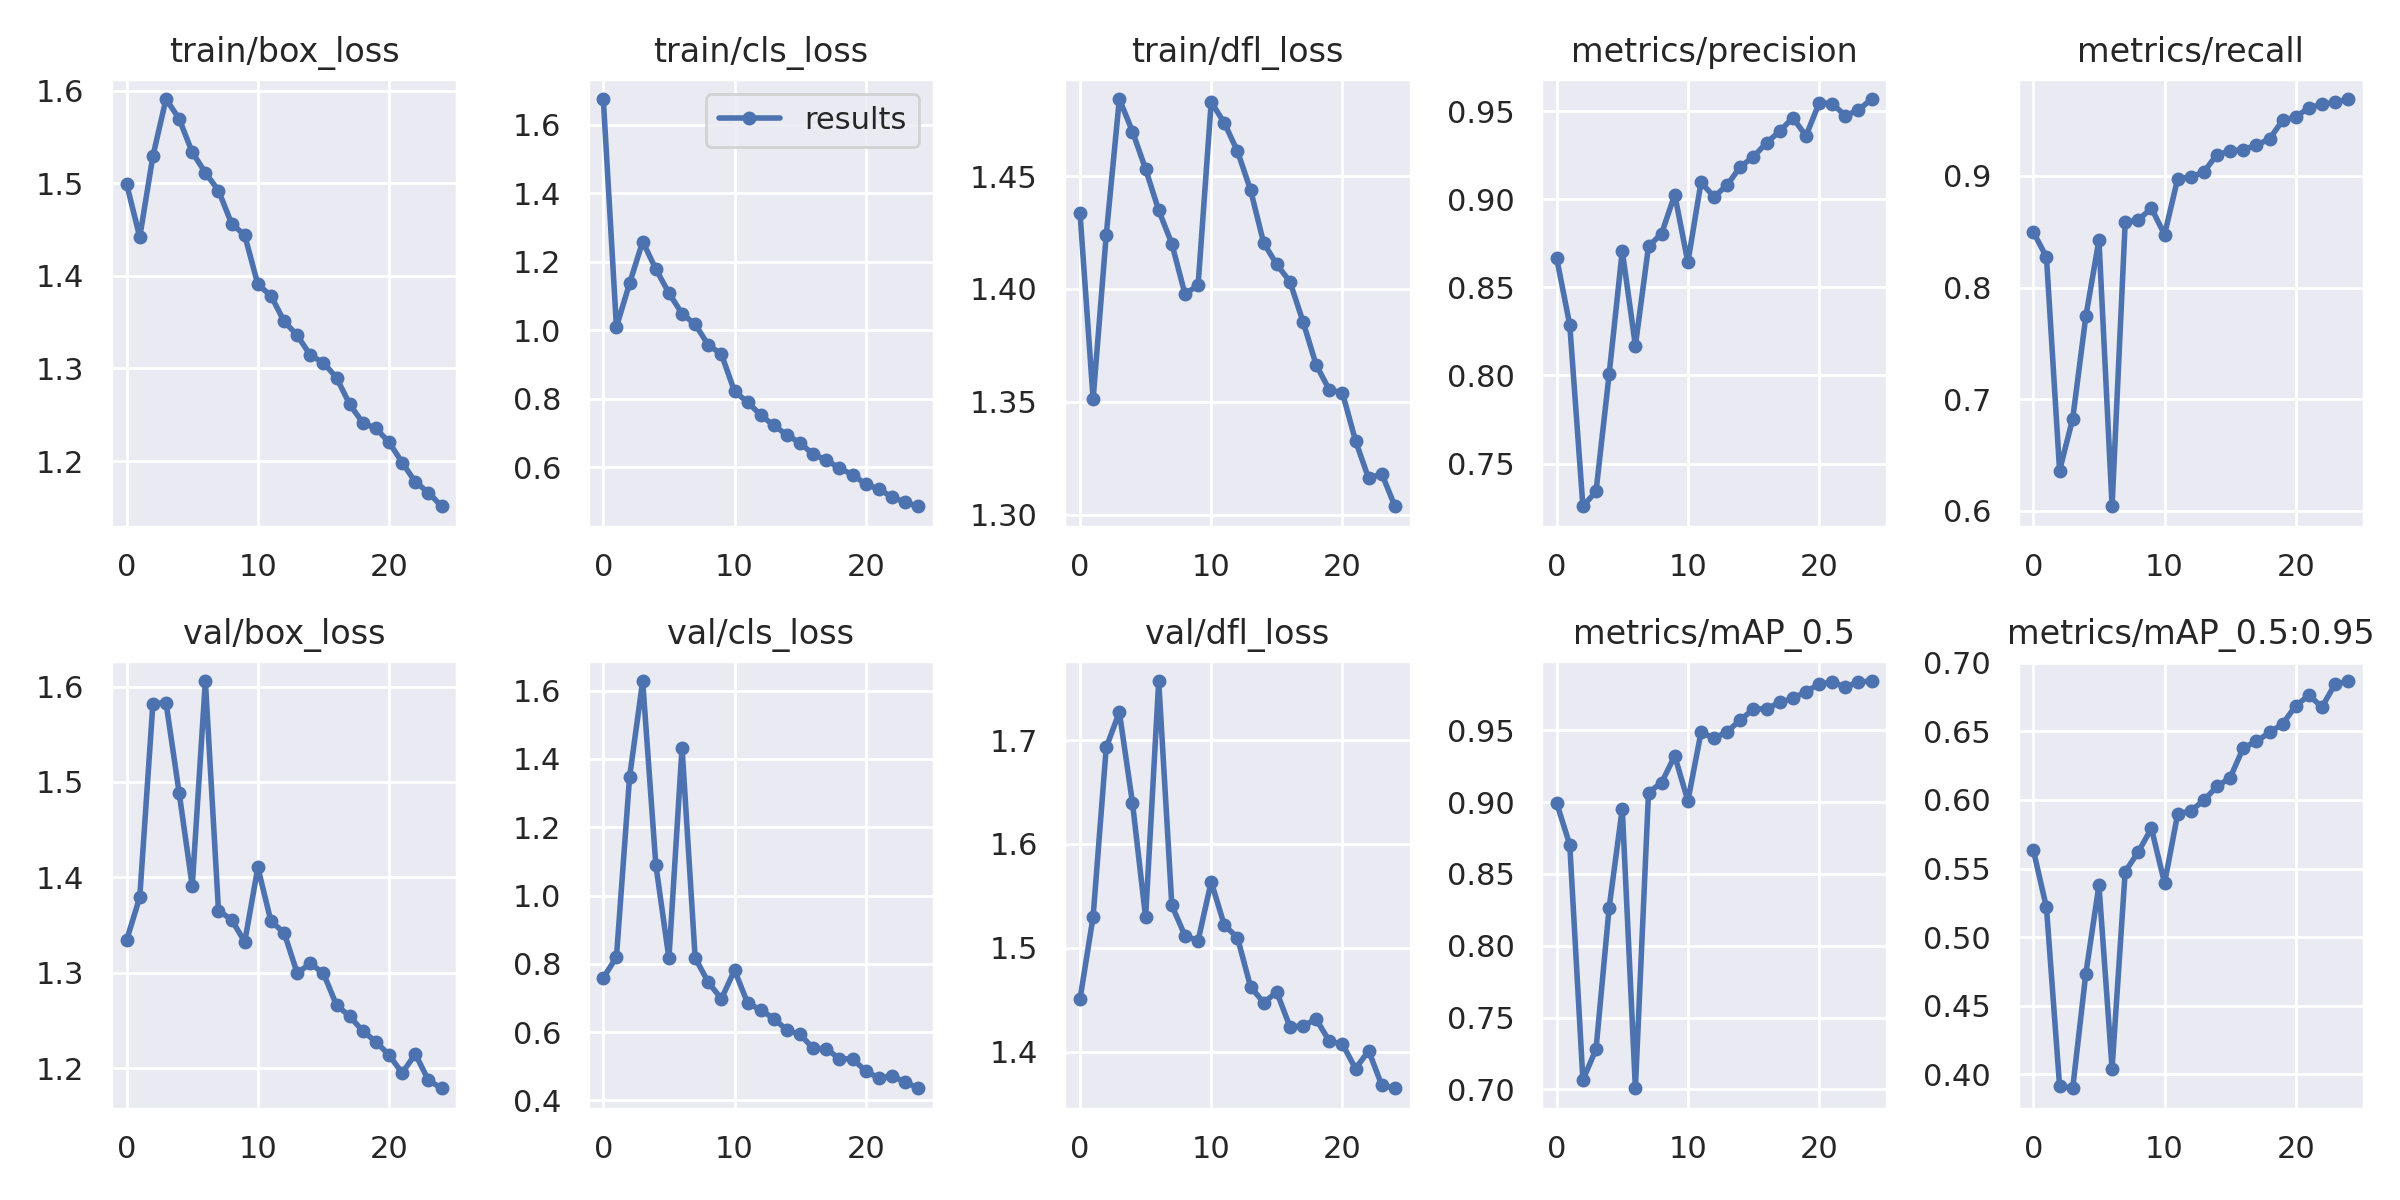

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

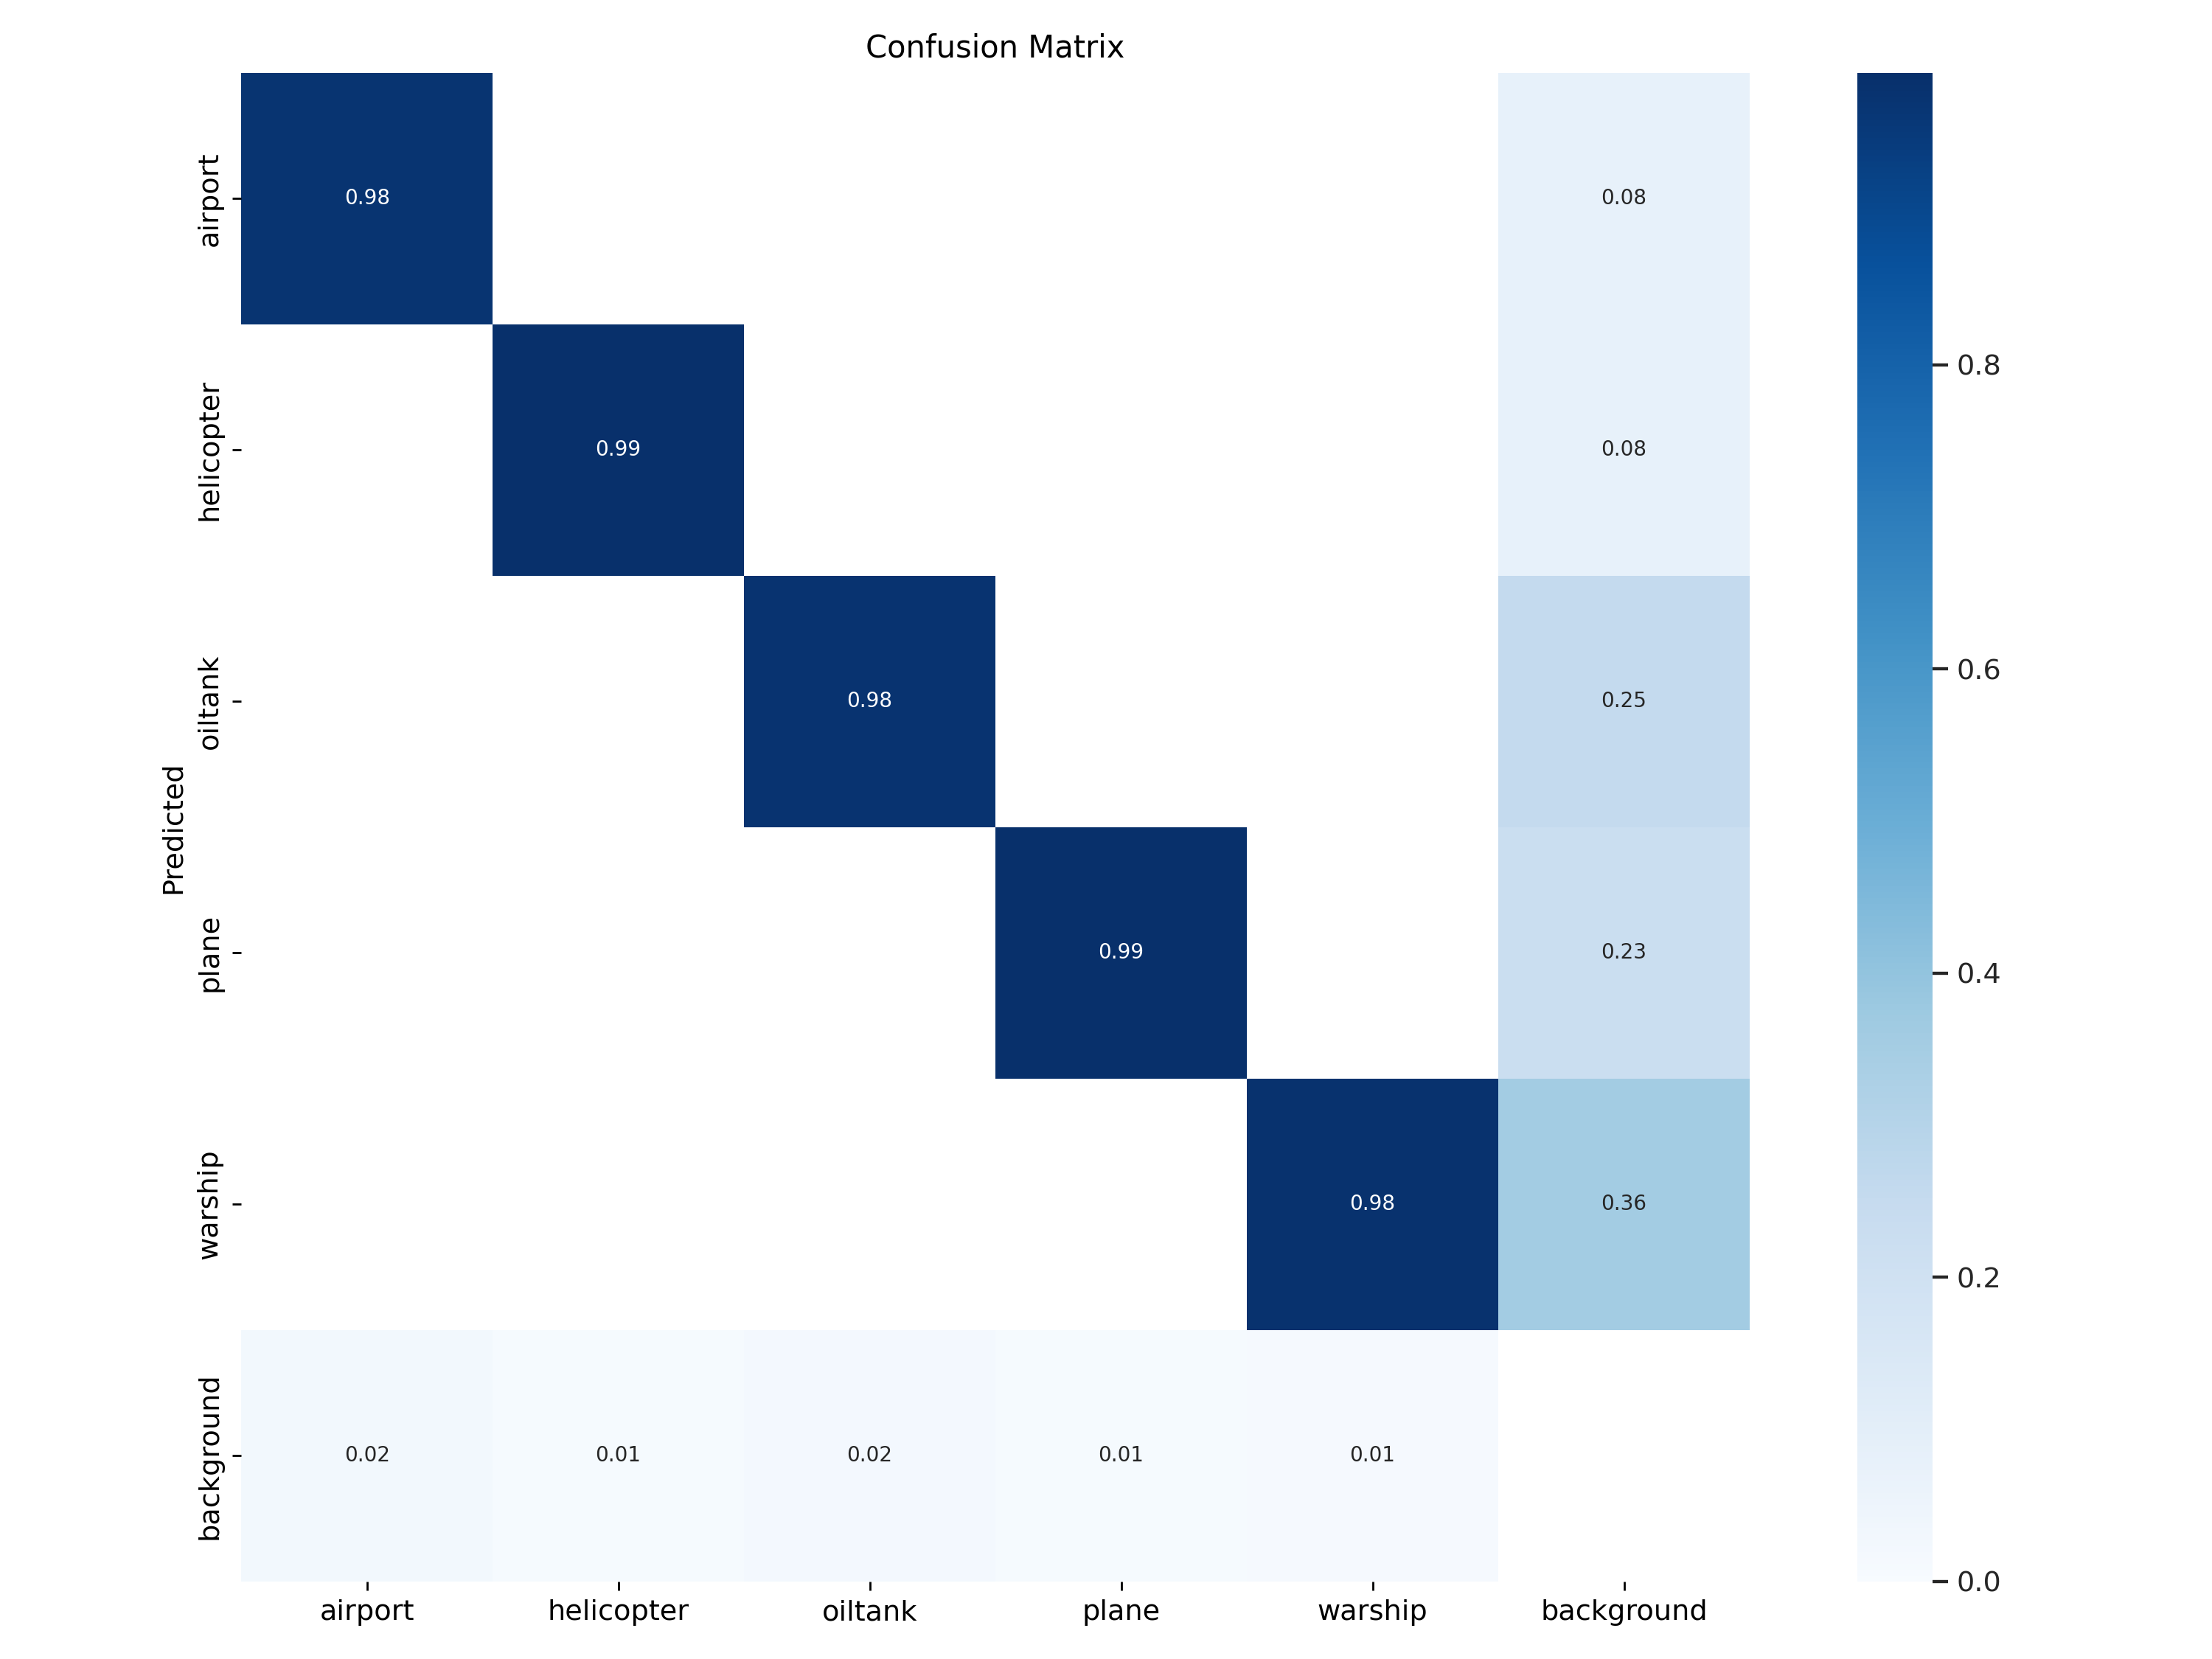

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

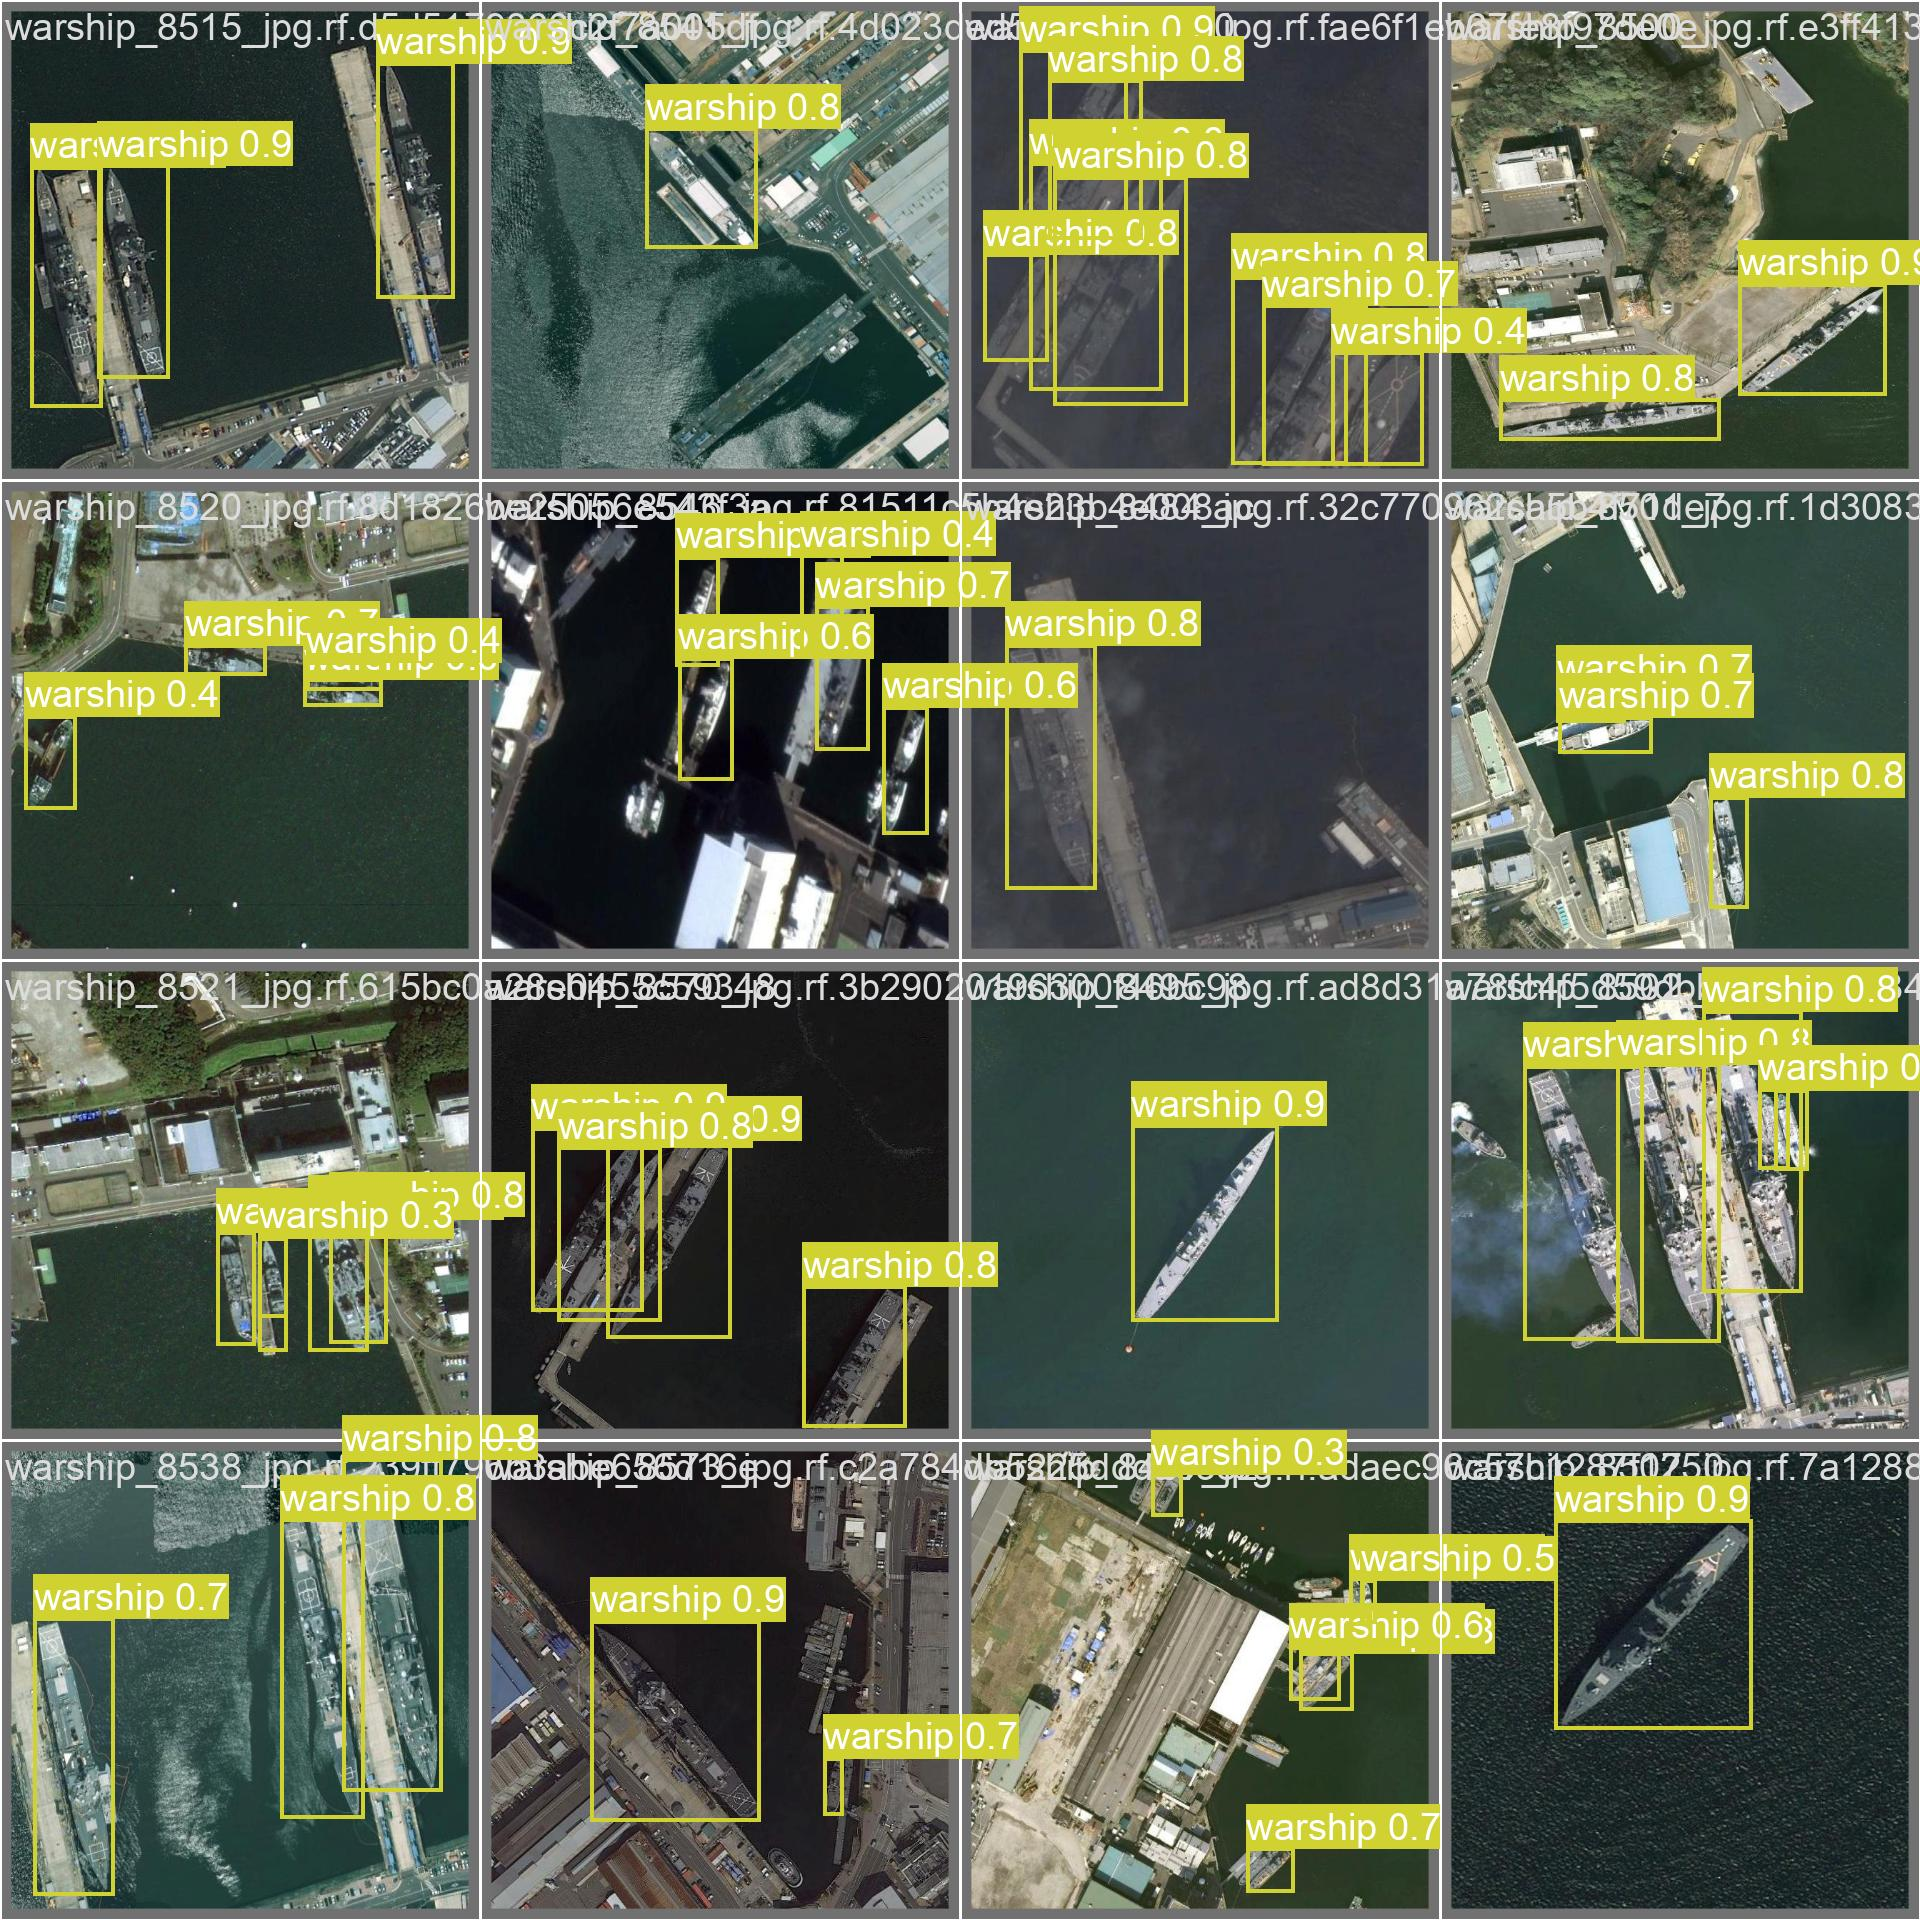

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/yolov9/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/yolov9/RSD-GOD-1/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414815 parameters, 0 gradients, 102.5 GFLOPs
image 1/982 /content/yolov9/yolov9/RSD-GOD-1/test/images/airbase_10000_jpg.rf.11ea97e48c674eb5fb792a8b0f031b3b.jpg: 1280x1280 2 airports, 142.1ms
image 2/982 /content/yolov9/yolov9/RSD-GOD-1/test/images/airbase_10041_jpg.rf.3e35c8f7712c79e064efbbdc3044dcbb.jpg: 1280x1280 3 airports, 114.4ms
image 3/98

In [ ]:
#подгружаем модель в робофлоу
!pip install -q inference supervision

In [ ]:
import cv2
import random
# Импортируем модуль getpass, который предоставляет
# портативный способ обработки паролей безопасным образом
import getpass

# Импортируем модуль supervision (sv), для аннотации конечных изображений
import supervision as sv

# Импортируем функцию get_model из модуля inference.
# Эта функция, вероятно, используется для загрузки
# обученной модели и для выполнения вывода
from inference import get_model


# %matplotlib inline

In [ ]:
# Запускаем процесс развертывания модели с помощью метода deploy объекта version
version.deploy(
    # Указываем тип модели, в данном случае "yolov9"
    model_type="yolov9",
    # Указываем путь к файлу с весами модели
    model_path=f"{HOME}/yolov9/runs/train/exp"
)

View the status of your deployment at: https://app.roboflow.com/animals-sqrdn/rsd-god/1
Share your model with the world at: https://universe.roboflow.com/animals-sqrdn/rsd-god/model/1


In [ ]:
# Используем функцию getpass для безопасного ввода API-ключа Roboflow
ROBOFLOW_API_KEY = getpass.getpass()

# Получаем модель с помощью функции get_model. Мы передаем идентификатор модели и API-ключ.
model = get_model(
    # Идентификатор модели, который состоит из имени проекта и номера версии
    model_id="first-ugfem/1",
    # API-ключ для доступа к Roboflow
    api_key=ROBOFLOW_API_KEY
)

··········


In [ ]:
# Получаем список путей к изображениям в указанной директории с определенными расширениями
image_paths = sv.list_files_with_extensions(
    # Указываем директорию, где находятся изображения
    directory=f"{dataset.location}/test/images",
    # Указываем расширения файлов, которые мы хотим найти
    extensions=['png', 'jpg', 'jpeg']
)

# Выбираем случайный путь к изображению из списка
image_path = random.choice(image_paths)

# Читаем изображение с помощью функции imread из библиотеки cv2
image = cv2.imread(image_path)

# Производим детекцию объектов на изображении с помощью модели
result = model.infer(
    # Указываем изображение, на котором нужно провести детекцию
    image,
    # Устанавливаем пороговое значение для детекции объектов равным 0.1
    confidence=0.1
)[0]

# Преобразуем результат детекции в объект Detections
detections = sv.Detections.from_inference(result)

In [ ]:
# Создаем аннотатор меток с черным цветом текста
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

# Создаем аннотатор ограничивающих рамок
bounding_box_annotator = sv.BoundingBoxAnnotator()

# Создаем копию изображения для аннотации
annotated_image = image.copy()

# Аннотируем изображение ограничивающими рамками, используя результаты детекции
annotated_image = bounding_box_annotator.annotate(scene=annotated_image, detections=detections)

# Аннотируем изображение метками, используя результаты детекции
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# Выводим аннотированное изображение
sv.plot_image(annotated_image)

array([[[184, 158, 144],
        [184, 158, 144],
        [184, 158, 144],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[184, 158, 144],
        [184, 158, 144],
        [184, 158, 144],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[183, 157, 143],
        [184, 158, 144],
        [185, 159, 145],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
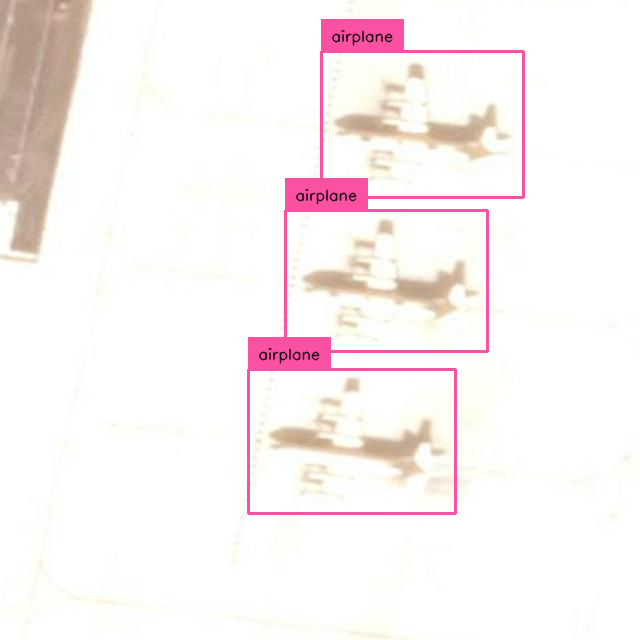

In [ ]:
annotated_image